# PHY480/905 Semester Project Template

**INSTRUCTIONS**: This is a template to help organize your project.  All projects must include the 5 major sections below (you do not need to use this template file).  Complete your work below and remove content in parentheses. 

#### PHY 480/905 Semester Project
### &#9989; Kinza Hasan)
#### &#9989; Last Updated on 4/14/2024

# Van der Pol Oscillator

##  Introduction 

 
The Van Der Pol Oscillator that I will be looking at in this project is an example of a classical oscillator that models various electronic and biological systems. It was origianlly by the Dutch electrical engineer Balthasar van der Pol in the 1920s as he was studying electric circuits in Vacuum tubes. In such systems the oscillations eventually reach a limit cycle which Van der Pol called 'relaxation oscillations'. These types of oscillations are eventually self sustained and so are very interesting to study. The differential equation describing this type of oscillatory behaviour is given below:

$\frac{d^2x}{dt^2} - \mu(1-x^2)\frac{dx}{dt} +\beta x =F(sin(\alpha t))$

Due to the $\mu$ and $\alpha$ dependance the equation does not have generalised closed form solutions as of yet.Therefore we need some sort of a numeical integration method to solve the equation and study the behaviour of the system. Therefore in this project I attempted to look at various integration techniques to solve this problem and then therefore study the mu and alpha dependance to see how does the position velocity and phase space changes for this model for a set of initial conditions.

**Questions Asked**
- What is the best numerical integration method to solve this problem?
- How does the behaviour of the system change qualitatitively as we vary the mu parameter?
- How does the behaviour of the system changev qualitatitively as we vary the alpha parameter?
- How does the behaviour of the enrgy change for a fixed value of mu and alpha.


## Methodology

In [5]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import pandas as pd
import os

import time
from IPython.display import clear_output
%matplotlib inline
from matplotlib.animation import FuncAnimation
from IPython import display
from IPython.display import clear_output, display
#Importing the necessary modules

When $\mu$ and $\alpha$ are zero the differentail equation reduces to a simple harmonic oscillator with known analytical solutions.
For the purposes of this anlysis we asume $\beta=1$. The initial conditions we will consider in this report are that $x(0)=1$ and $x'(0)=0$.

The Van der pol equation then reduces to:
$\frac{d^2x}{dt^2} +\beta x =0$ with the analytical solution $x=cos(t)$

Now that we know the analytical solution we will look at various integration techniques one by one and comapre them to the analytical solution. A very important thing to consider while applying each integrating method is to see if the error (difference between analytical and numerical solutions) converges to zero as we increase the number of timesteps. This is considered in the methodology below. To test the validity of each solution we will look at the mean error and the maxmium error. We will first see if both the errors converge to zero as we increase the number of time step iterations and then compare the 6 integration techniques with each other to determine the most accurate one.

In [6]:
#Numerical solutions:

def VDPO(mu,t,X, V):
    dX = V
    dV = mu*(1-X**2)*V - X
    return dX, dV


'''Defining the Van der Pol oscillator function without the driving force'''
# Looking at the yssytem where mu is zero to see the most relaible integration method to compare it with the analytical

'Defining the Van der Pol oscillator function without the driving force'

In [7]:
t=np.arange(0,1000,10)
Act=np.cos(t)
#Calculating the Actual solution for a certain number of time steps.

The first integration method we will look at is the runga kutta 2 method that we also looked at in the class.

In [12]:
#Runga-Kutta 2

"""Defining the Runga KUtta force with the consatant parameters that we will test out later with regards to the VDPO 
oscillator function that is defined above."""
def RK(f, tf, n, mu):

    v = 0
    x = 1
    X_values = []
    V_values = []
    h = tf / n
    tpoints = np.arange(0, tf, h)
    for t in tpoints:
        X_values.append(x)
        V_values.append(v)
        k1x, k1v = f(mu, t, x, v)
        k2x, k2v = f(mu, t + h, x + h * k1x, v + h * k1v)
        x += h * (k2x + k1x) / 2
        v += h * (k2v + k1v) / 2
    return tpoints, X_values, V_values


In [13]:
#Testing convergencee by increasing number of time steps:
tsteps=[100,1000,10000,100000]
mean_err=[]
max_err=[]
for ts in tsteps:
    trk,xrk,vrk=RK(VDPO,20,ts,0)
    Act=np.cos(trk)
    max_err.append(np.max(np.abs(xrk-Act)))
    mean_err.append(np.mean(np.abs(xrk-Act)))
    
    

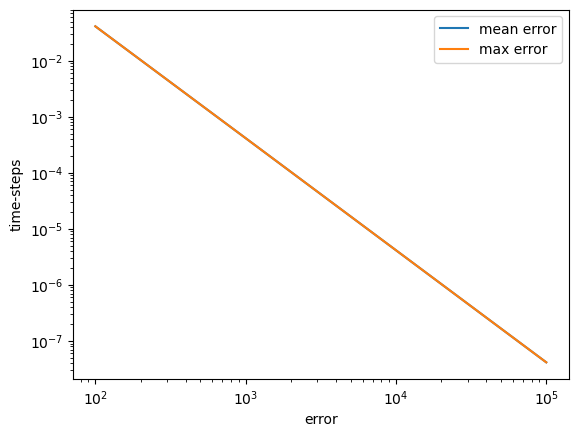

In [14]:
plt.plot(tsteps,mean_err,label='mean error')
plt.plot(tsteps,mean_err,label='max error')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('error')
plt.ylabel('time-steps')
plt.legend()
plt.show()

In [15]:
trkut,xrkut,vrkut=RK(VDPO,20,1000000,0)


As this downwards sloping graph with the log scale shows that as we increase the time steps teh error clearly converges to zero. The next integration method is Runga Kutta 4 which we also looked at in class.

In [16]:
#Runga-Kutta 4
def RK4(f, tf, n, mu):
    v = 0
    x = 1
    X_values = []
    V_values = []
    h = tf / n
    tpoints = np.arange(0, tf, h)
    for t in tpoints:
        X_values.append(x)
        V_values.append(v)
        
        k1x, k1v = f( mu, t, x, v)
    
        k2x, k2v = f( mu, t + h / 2, x + h / 2 * k1x, v + h / 2 * k1v)
    
        k3x, k3v = f( mu, t + h / 2, x + h / 2 * k2x, v + h / 2 * k2v)
    
        k4x, k4v = f( mu, t + h, x + h * k3x, v + h * k3v)
    
        x += h / 6 * (k1x + 2 * k2x + 2 * k3x + k4x)
        v += h / 6 * (k1v + 2 * k2v + 2 * k3v + k4v)
        
    return tpoints, X_values, V_values
"""Defining the function for RK4"""

'Defining the function for RK4'

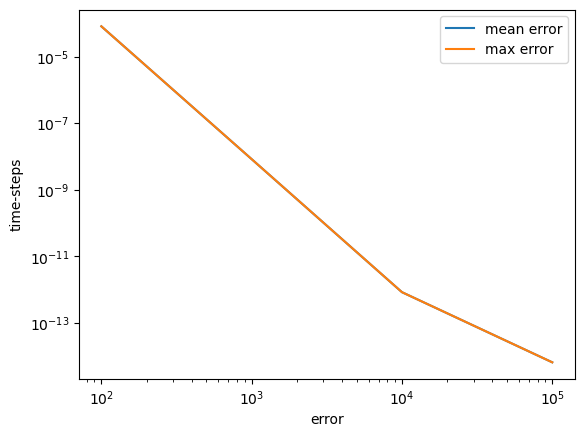

In [17]:
tsteps=[100,1000,10000,100000]
mean_err=[]
max_err=[]
for ts in tsteps:
    trk,xrk,vrk=RK4(VDPO,20,ts,0)
    Act=np.cos(trk)
    max_err.append(np.max(np.abs(xrk-Act)))
    mean_err.append(np.mean(np.abs(xrk-Act)))
plt.plot(tsteps,mean_err,label='mean error')
plt.plot(tsteps,mean_err,label='max error')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('error')
plt.ylabel('time-steps')
plt.legend()
plt.show()

In [18]:
trk4,xrk4,vrk4=RK4(VDPO,20,1000000,0)


RK4 also exhibits a very similar behaviour for the convergence of the error as we increase the number of time steps. The next method is Runga Kutta 45 -Fehlberg method, here instead of looping a cerain number of times we introduce an error parameter as epsilon and the function loops while that error becomes less than the final t given, and the step size h is adjusted according to the error. This method also does not follow the same convergence as we increase the step size.

In [19]:
def RK45(func, tf, n, mu):
    # Initialize parameters
    epsilon = 1e-6  # Error tolerance
    x_initial = 1  # Initial position
    v_initial = 0  # Initial velocity
    t0 = 0  # Initial time
    h = tf / n  # Step size
    t = t0  # Initialize time
    x = x_initial  # Initialize position
    v = v_initial  # Initialize velocity

    # Initialize lists to store results
    tpoints = [t0]
    x_values = [x_initial]
    v_values = [v_initial]

    # Main loop
    while t < tf:
        # Calculate k1 to k6
        k1x, k1v = func(mu, t, x, v)
        k2x, k2v = func(mu, t + h / 4, x + h * k1x / 4, v + h * k1v / 4)
        k3x, k3v = func(mu, t + 3 * h / 8, x + 3 * h * k1x / 32 + 9 * h * k2x / 32,
                        v + 3 * h * k1v / 32 + 9 * h * k2v / 32)
        k4x, k4v = func(mu, t + 12 * h / 13, x + 1932 * h * k1x / 2197 - 7200 * h * k2x / 2197 + 7296 * h * k3x / 2197,
                        v + 1932 * h * k1v / 2197 - 7200 * h * k2v / 2197 + 7296 * h * k3v / 2197)
        k5x, k5v = func(mu, t + h, x + h * (439 * k1x / 216 - 8 * k2x + 3680 * k3x / 513 - 845 * k4x / 4104),
                        v + h * (439 * k1v / 216 - 8 * k2v + 3680 * k3v / 513 - 845 * k4v / 4104))
        k6x, k6v = func(mu, t + h / 2, x - 8 * h * k1x / 27 + 2 * h * k2x / 3 - 3544 * h * k3x / 2565 + 1859 * h * k4x / 4104 - 11 * h * k5x / 40,
                        v - 8 * h * k1v / 27 + 2 * h * k2v / 3 - 3544 * h * k3v / 2565 + 1859 * h * k4v / 4104 - 11 * h * k5v / 40)

        # Compute next step value w1 and w2
        x1 = x + h * (25 * k1x / 216 + 1408 * k3x / 2565 + 2197 * k4x / 4104 -1* k5x / 5) 
        v1 = v + h * (25 * k1v / 216 + 1408 * k3v / 2565 + 2197 * k4v / 4104 -1 * k5v / 5) 
        x2 = x + h * (16 * k1x / 135 + 6656 * k3x / 16285 +  28561 * k4x / 56430 -9 * k5x / 50 + 2* k6x / 55)
        v2 = v + h * (16* k1v / 135 + 6656 * k3v / 16285 +  28561* k4v / 56430 -9 * k5v / 50 + 2* k6v / 55)

        # Compute error R
        R = 1/h * np.abs(np.sqrt(x1**2+v1**2)-np.sqrt(x2**2+v2**2))

        # Check error tolerance
        if R <= epsilon:
            t += h
            x = x1
            v = v1
            tpoints.append(t)
            x_values.append(x)
            v_values.append(v)
            h = min(0.84 * (epsilon / R) ** 0.25 * h, tf - t)  # Adjust step size
        else:
            h *= 0.84 * (epsilon / R) ** 0.25  # Reduce step size and retry

    return tpoints, x_values, v_values

       
"""Function for the RK45 method"""
#Reference: https://math.okstate.edu/people/yqwang/teaching/math4513_fall11/Notes/rungekutta.pdf

'Function for the RK45 method'

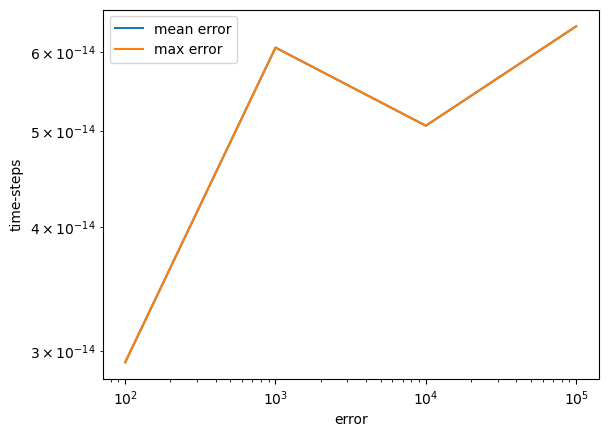

In [20]:
tsteps=[100,1000,10000,100000]
mean_err=[]
max_err=[]
for ts in tsteps:
    trk,xrk,vrk=RK45(VDPO,20,ts,0)
    Act=np.cos(trk)
    max_err.append(np.max(np.abs(xrk-Act)))
    mean_err.append(np.mean(np.abs(xrk-Act)))
plt.plot(tsteps,mean_err,label='mean error')
plt.plot(tsteps,mean_err,label='max error')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('error')
plt.ylabel('time-steps')
plt.legend()
plt.show()

In [21]:
trk45,xrk45,vrk45= RK45(VDPO, 20, 1000000, 0)


As we see the convergence pattern is not the same but lies in the same range for the time steps so it is stable and independant of the time steps as it uses a while loop instead of a for loop.  The next method we looked at was Euler which was also done in class.

In [22]:

def euler(f, tf, n, mu):
    V_values = [0]  # Initial condition for V
    X_values = [1]  # Initial condition for X
    h = tf / n
    tpoints = np.arange(0, tf, h)
    for t in tpoints[1:]:
        X, V = X_values[-1], V_values[-1]
        
        # Calculate derivatives at the current point
        dX, dV = f(mu, t, X, V)
        
        # Update X and V using Euler's method
        X_new = X + h * dX
        V_new = V + h * dV
        
        # Append the new values to the lists
        X_values.append(X_new)
        V_values.append(V_new)
        
    return tpoints, X_values, V_values

"""Function defining euler"""

'Function defining euler'

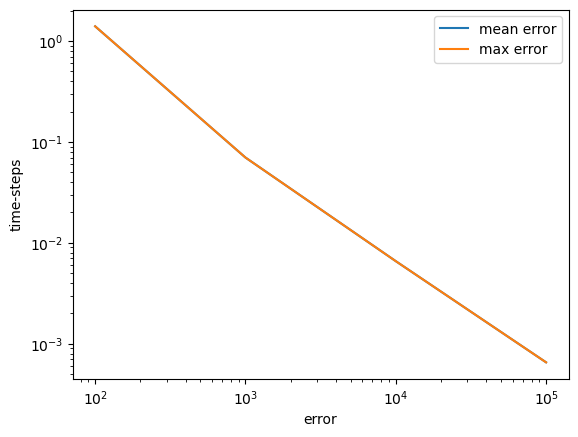

In [23]:
tsteps=[100,1000,10000,100000]
mean_err=[]
max_err=[]
for ts in tsteps:
    trk,xrk,vrk=euler(VDPO,20,ts,0)
    Act=np.cos(trk)
    max_err.append(np.max(np.abs(xrk-Act)))
    mean_err.append(np.mean(np.abs(xrk-Act)))
plt.plot(tsteps,mean_err,label='mean error')
plt.plot(tsteps,mean_err,label='max error')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('error')
plt.ylabel('time-steps')
plt.legend()
plt.show()

In [24]:
te,xe,ve=euler(VDPO,20,1000000,0)


Although euler follows the same convergence pattern, its error is pretty huge compared to the RK methods, This can be due to the fact Euler injects energy into the system as it uses the previous step count approximation. To adress this issue we can look at the next two methods. The next method is called the Adams-Bashfroth method 2 and it introduces a linear multi step to obtain the next value of x and v, twice

In [25]:
def AB2(f, tf, n, mu):
    v = 0
    x = 1
    X_values = []
    V_values = []
    h = tf / n
    tpoints = np.arange(0, tf, h)
 
    X_values.append(x)
    V_values.append(v)
    k1x, k1v = f(mu, 0, x, v)  # Initial value at t=0
    v += h * k1v
    x += h * (v + h / 2 * k1v)
    
    X_values.append(x)
    V_values.append(v)
    k2x, k2v = f(mu, h, x, v)  # Value at first step
    v += h * k2v
    x += h * (v + h / 2 * k2v)
    
    for t in tpoints[2:]:
        X_values.append(x)
        V_values.append(v)
  
        fn_minus_1_x, fn_minus_1_v = f(mu, t - h, X_values[-2], V_values[-2])  # Value at t - h
        fn_x, fn_v = f(mu, t, X_values[-1], V_values[-1])  # Current value
        
        x += h / 2 * (3 * fn_x - fn_minus_1_x)
        v += h / 2 * (3 * fn_v - fn_minus_1_v)
        
    return tpoints, X_values, V_values
"""Function for Adams Bashforth method"""

#https://john-s-butler-dit.github.io/NumericalAnalysisBook/Chapter%2004%20-%20Multistep%20Methods/402_Adams%20Bashforth%20Population%20Equations.html

'Function for Adams Bashforth method'

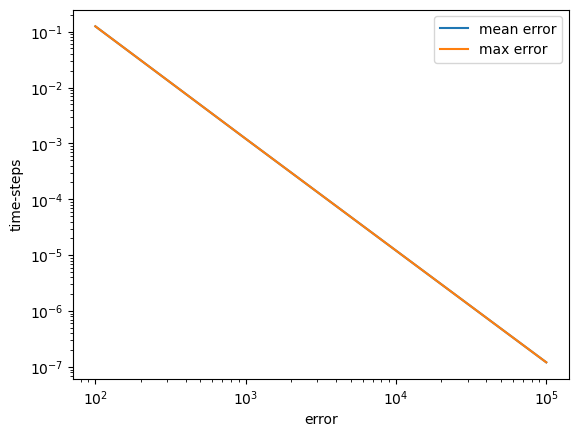

In [26]:
tsteps=[100,1000,10000,100000]
mean_err=[]
max_err=[]
for ts in tsteps:
    trk,xrk,vrk=AB2(VDPO,20,ts,0)
    Act=np.cos(trk)
    max_err.append(np.max(np.abs(xrk-Act)))
    mean_err.append(np.mean(np.abs(xrk-Act)))
plt.plot(tsteps,mean_err,label='mean error')
plt.plot(tsteps,mean_err,label='max error')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('error')
plt.ylabel('time-steps')
plt.legend()
plt.show()

In [27]:
tab2,xab2,vab2=AB2(VDPO,20,1000000,0)


We see the error is significantly reduced as compared to Euler. We can take this analysis and method further through our next method. This is the same method as Adams Bashforth 2 but it uses a 4 time multistep to append to x and v accordingly, so instead of approximating the next solution with 2 prior solutions it approximates based on 4 prior solutions.

In [28]:
#Adams-Bashforth
def AB4(f, tf, n, mu):
    v = 0
    x = 1
    X_values = []
    V_values = []
    h = tf / n
    tpoints = np.arange(0, tf, h)
    
    for _ in range(3):
        X_values.append(x)
        V_values.append(v)
        k1x, k1v = f(mu, 0, x, v)  # Initial value at t=0
        v += h * k1v
        x += h * (v + h / 2 * k1v)
    
    for t in tpoints[3:]:
        X_values.append(x)
        V_values.append(v)
       
        fn_minus_1_x, fn_minus_1_v = f(mu, t - 2 * h, X_values[-2], V_values[-2])  # Value at t - 2h
        fn_minus_2_x, fn_minus_2_v = f(mu, t - h, X_values[-3], V_values[-3])  # Value at t - h
        fn_minus_3_x, fn_minus_3_v = f(mu, t, X_values[-4], V_values[-4])  # Value at t
        
        fn_x, fn_v = f(mu, t + h, X_values[-1], V_values[-1])  # Current value
        
        x += h / 24 * (55 * fn_x - 59 * fn_minus_1_x + 37 * fn_minus_2_x - 9 * fn_minus_3_x)
        v += h / 24 * (55 * fn_v - 59 * fn_minus_1_v + 37 * fn_minus_2_v - 9 * fn_minus_3_v)
        
    return tpoints, X_values, V_values
#https://en.wikipedia.org/wiki/Linear_multistep_method

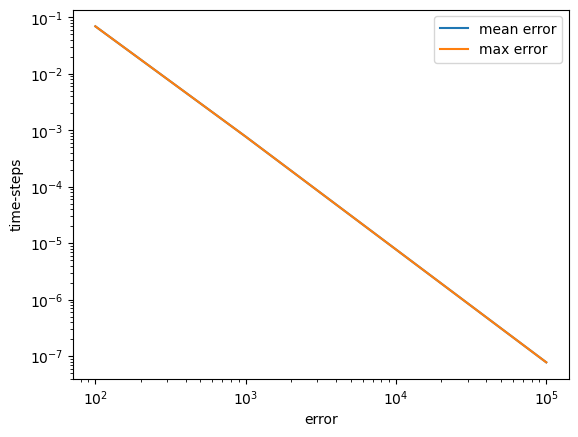

In [29]:
tsteps=[100,1000,10000,100000]
mean_err=[]
max_err=[]
for ts in tsteps:
    trk,xrk,vrk=AB4(VDPO,20,ts,0)
    Act=np.cos(trk)
    max_err.append(np.max(np.abs(xrk-Act)))
    mean_err.append(np.mean(np.abs(xrk-Act)))
plt.plot(tsteps,mean_err,label='mean error')
plt.plot(tsteps,mean_err,label='max error')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('error')
plt.ylabel('time-steps')
plt.legend()
plt.show()

In [30]:
tab4,xab4,vab4=AB4(VDPO,20,1000000,0)


Now that we have all the 6 integration methods lined up we can compare them directly with our analytical solution. To start off we will plot all of them on top of each other to qualitatively compare them with the analyticaql solution.

C:\Users\49176\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


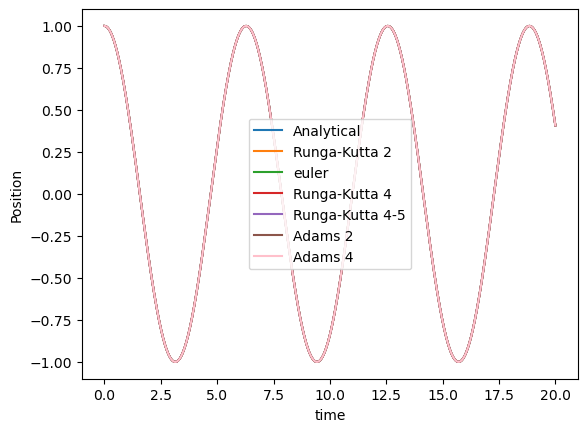

In [31]:
t=np.arange(0,20,20/1000000)
plt.plot(t,np.cos(t),label='Analytical')
plt.plot(t,xrkut,label='Runga-Kutta 2')
plt.plot(t,xe,label='euler')
plt.plot(trk4,xrk4,label='Runga-Kutta 4')
plt.plot(trk45,xrk45,label='Runga-Kutta 4-5')
plt.plot(t,xab2,label='Adams 2')
plt.plot(t,xab4,label='Adams 4',color='pink')
plt.xlabel('time')
plt.ylabel('Position')
plt.legend()
plt.show()
#We now plot the analytical solution with respect to all other solutions

The graph perfectly overlaps so we plot the errors together to see which integration techniques work best (Note: This graph is just for me playing with the code the actual results of the same graph are given ion the results and discussions section)

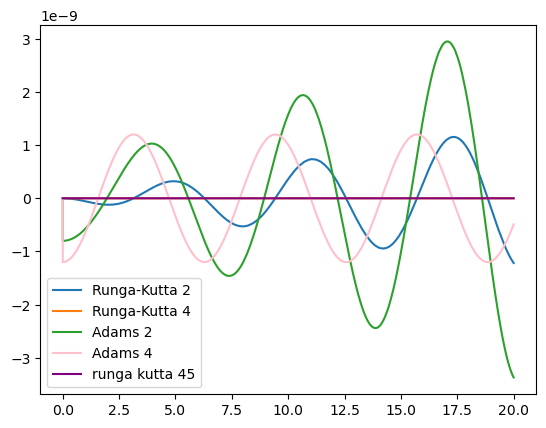

In [32]:
Act=np.cos(t)
plt.plot(t,xrkut-Act,label='Runga-Kutta 2')
plt.plot(t,xrk4-Act,label='Runga-Kutta 4')
plt.plot(t,xab2-Act,label='Adams 2')
plt.plot(t,xab4-Act,label='Adams 4',color='pink')
plt.plot(trk45,xrk45-np.cos(trk45),label='runga kutta 45',color='purple')
#plt.plot(t,xe-Act,label='euler',color='purple')
plt.legend()

Now I look at theresults qualitataively to calculate the mean and maximum error of the six integration methods.

In [33]:
#MEAN ERROR CALCULATION
mean_errors = {
    "Runga-kutta-2": np.mean(np.abs(xrkut-Act)),
    "Runga-kutta-4": np.mean(np.abs(xrk4-Act)),
    "Runga-kutta-45": np.mean(np.abs(xrk45-np.cos(trk45))),
    "Adams-Bashforth-2": np.mean(np.abs(xab2-Act)),
    "Adams-Bashforth-4": np.mean(np.abs(xab4-Act)),
    "Euler": np.mean(np.abs(xe-Act))
}
mean_errors

{'Runga-kutta-2': 4.156700765134582e-10,
 'Runga-kutta-4': 1.8397444364399766e-14,
 'Runga-kutta-45': 4.210915373792738e-14,
 'Adams-Bashforth-2': 1.2109266181654465e-09,
 'Adams-Bashforth-4': 7.747936771323581e-10,
 'Euler': 6.538656996656807e-05}

In [34]:
#Max errors:
max_errors = {
    "Runga-kutta-2": np.max(np.abs(xrkut-Act)),
    "Runga-kutta-4": np.max(np.abs(xrk4-Act)),
    "Runga-kutta-45": np.max(np.abs(xrk45-np.cos(trk45))),
    "Adams-Bashforth-2": np.max(np.abs(xab2-Act)),
    "Adams-Bashforth-4": np.max(np.abs(xab4-Act)),
    "Euler": np.max(np.abs(xe-Act))
}
max_errors

{'Runga-kutta-2': 1.2172624019868294e-09,
 'Runga-kutta-4': 4.729550084903167e-14,
 'Runga-kutta-45': 2.007283228522283e-13,
 'Adams-Bashforth-2': 3.369624801408122e-09,
 'Adams-Bashforth-4': 1.2000407334511465e-09,
 'Euler': 0.0001887781114034981}

#FINAL RESULT: (Spoiler!) We will use Runga Kutta-4 for when mu is not zero!
So now keeping $\alpha=0$ I will start the analysis for $\mu$. For this I will start to see how does the behaviour of the oscillator change as we vary $\mu$. Note this systrem does not have closed analytical solutions so Numerical integration is necessary.
The equation now becomes:
$\frac{d^2x}{dt^2} - \mu(1-x^2)\frac{dx}{dt} + x =0$

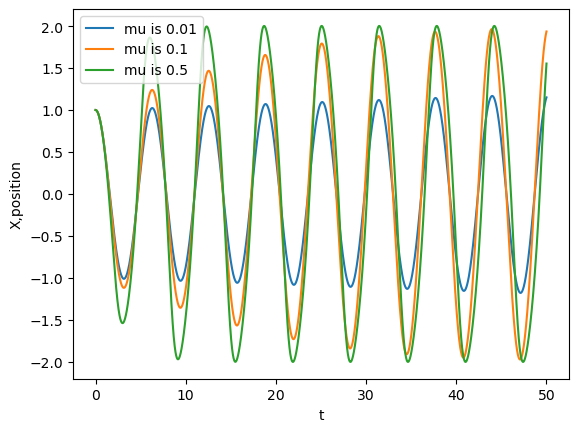

In [50]:
#Analysis for mu
mus=[0.01,0.1,0.5]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,50,100000,mu)
    plt.plot(trk4d,xrk4d,label=f'mu is {mu}')
plt.legend()
plt.xlabel('t')
plt.ylabel('X,position')
plt.show()
#Varying the values for mu

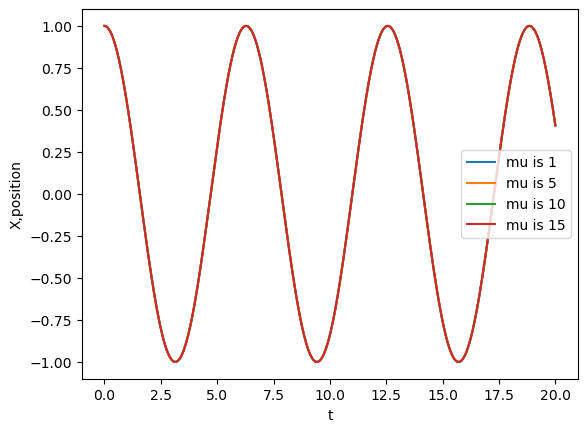

In [51]:
mus=[1,5,10,15]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,50,100000,mu)
    plt.plot(trk4,xrk4,label=f'mu is {mu}')
plt.legend()
plt.xlabel('t')
plt.ylabel('X,position')
plt.show()

#As mu increase it has no effect on position graphs

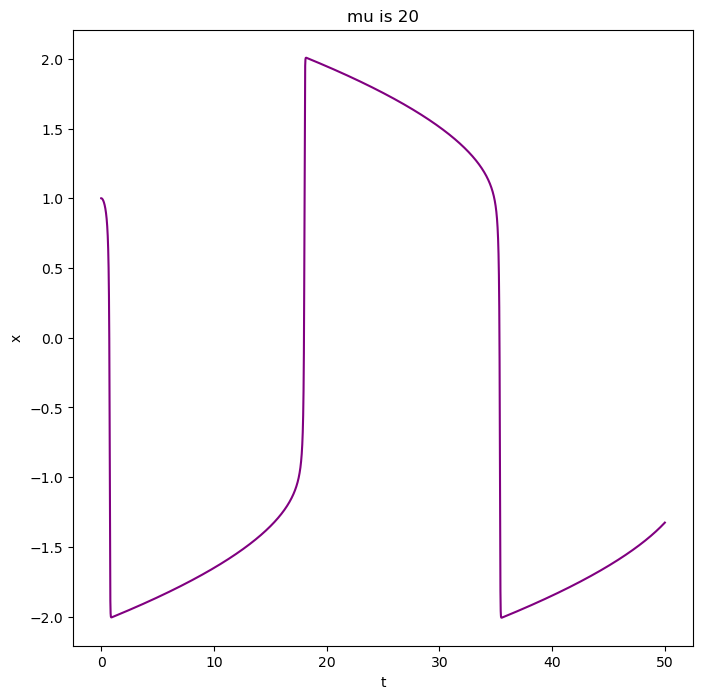

<Figure size 800x800 with 0 Axes>

In [37]:
#Animation as to how mu changes:
mus=[0.01,0.1,0,2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,15,20]
fig = plt.figure(figsize=(8,8))
# Generate and save images
for mu in mus:
    trk4d,xrk4d,vrkd4=RK4(VDPO,50,100000,mu)
    plt.plot(trk4d,xrk4d,color='purple')
    plt.title(f'mu is {mu}')
    plt.xlabel('t')
    plt.ylabel('x')
    time.sleep(0.01)
    
    clear_output(wait = True)
    display(fig)            # Reset display
    fig.clear()  


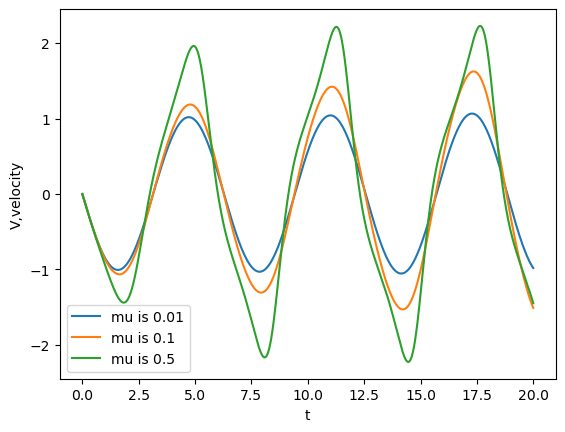

In [38]:
mus=[0.01,0.1,0.5]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,20,100000,mu)
    plt.plot(trk4d,vrk4d,label=f'mu is {mu}')
plt.legend()
plt.xlabel('t')
plt.ylabel('V,velocity')
plt.show()

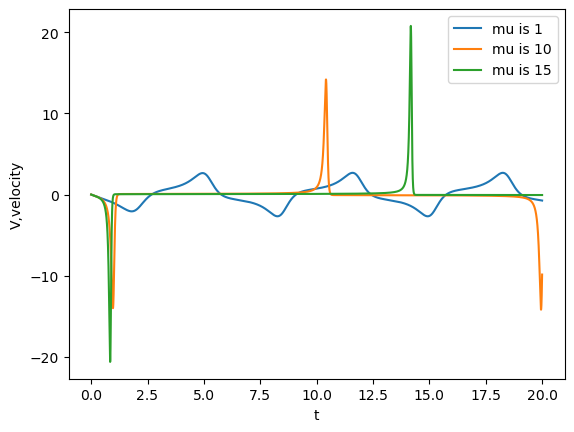

In [39]:
mus=[1,10,15]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,20,100000,mu)
    plt.plot(trk4d,vrk4d,label=f'mu is {mu}')
plt.xlabel('t')
plt.ylabel('V,velocity')
plt.legend()
plt.show()

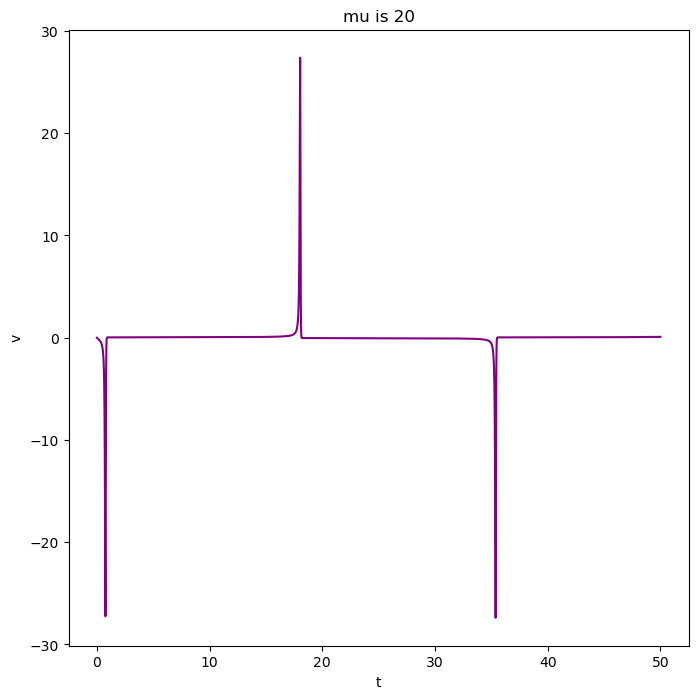

<Figure size 800x800 with 0 Axes>

In [40]:
mus=[0.01,0.1,0,2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,15,20]
fig = plt.figure(figsize=(8,8))
# Generate and save images
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,50,100000,mu)
    plt.plot(trk4d,vrk4d,color='purple')
    plt.title(f'mu is {mu}')
    plt.xlabel('t')
    plt.ylabel('v')
    time.sleep(0.01)
    #plt.ylim(-30,30)
    
    clear_output(wait = True)
    display(fig)            # Reset display
    fig.clear()  


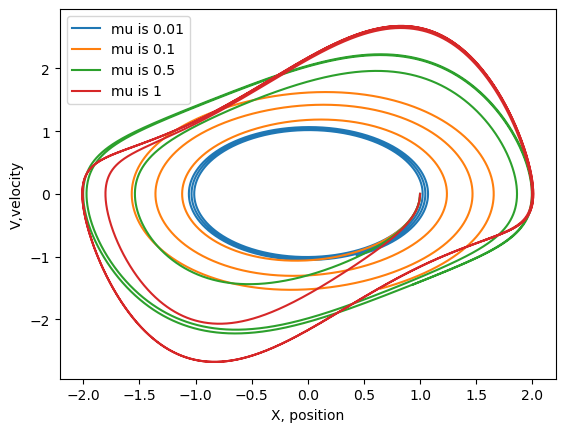

In [41]:
mus=[0.01,0.1,0.5,1]
#mus=[0.1,1,10]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,20,100000,mu)
    plt.plot(xrk4d,vrk4d,label=f'mu is {mu}')
plt.legend()
plt.xlabel('X, position')
plt.ylabel('V,velocity')
plt.show()
#Graph for the phase space as mu changes

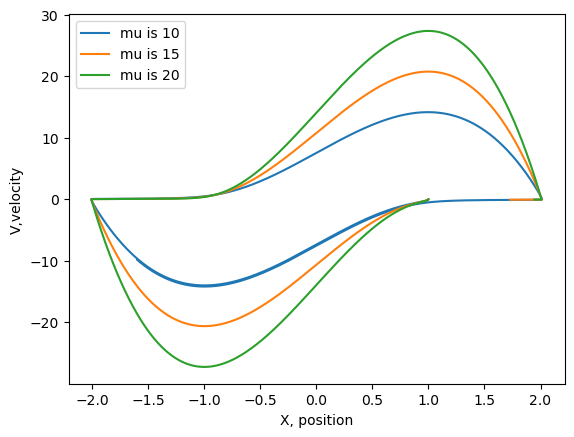

In [42]:
mus=[10,15,20]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,20,100000,mu)
    plt.plot(xrk4d,vrk4d,label=f'mu is {mu}')
plt.legend()
plt.xlabel('X, position')
plt.ylabel('V,velocity')
plt.show()
#Phase space for higher values of mu

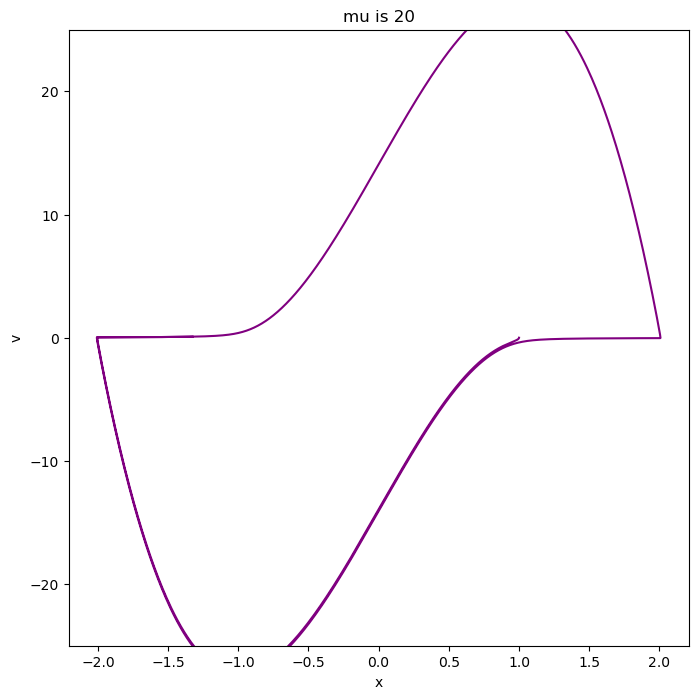

<Figure size 800x800 with 0 Axes>

In [43]:
#Animation as to how mu changes:
mus=[0.01,0.1,0,2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,15,20]
fig = plt.figure(figsize=(8,8))
# Generate and save images
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,50,100000,mu)
    plt.plot(xrk4d,vrk4d,color='purple')
    plt.title(f'mu is {mu}')
    plt.xlabel('x')
    plt.ylabel('v')
    time.sleep(0.01)
    plt.ylim(-25,25)
    
    clear_output(wait = True)
    display(fig)            # Reset display
    fig.clear()  


Now that we know how the behaviour of the phase diagram change as we vary $\mu$ we will look at a specific instance where $\mu$ is 1 to see the behaviour for various initial conditions.

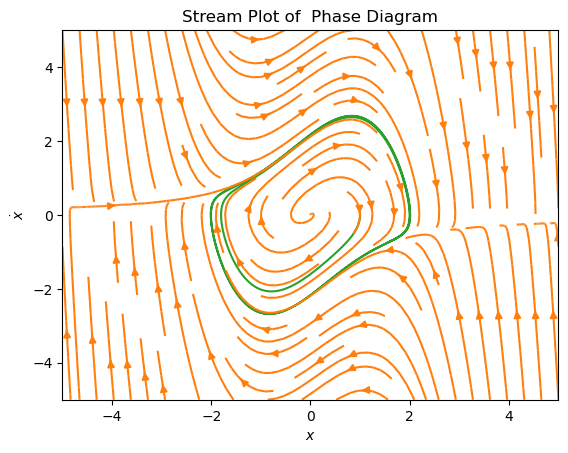

In [83]:
def generate_phase_space(x_lim, v_lim, grid_size,mu):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = VDPO(mu,trk4d,X, V)
    
    return X, V, dX, dV

x_lim = (-5, 5)
v_lim = (-5, 5)
grid_size = 20
X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size,1)
t,x,v=RK4(VDPO,20,100000,1)

plt.plot(x,v, label='Sample trajectory', c='C2')
plt.streamplot(X, V, dX, dV, color='C1')
plt.title('Stream Plot of  Phase Diagram')
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x}$');


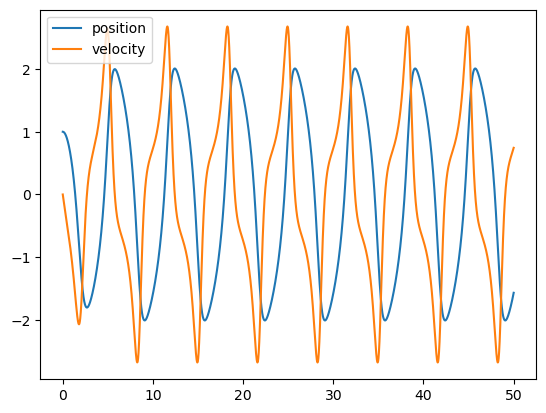

In [84]:
#Doing an enrgy Analysis:
#Looking at only mu=1
trk4d,xrk4d,vrk4d=np.array(RK4(VDPO,50,100000,1))
plt.plot(trk4d,xrk4d,label='position')
plt.plot(trk4d,vrk4d,label='velocity')
plt.legend()


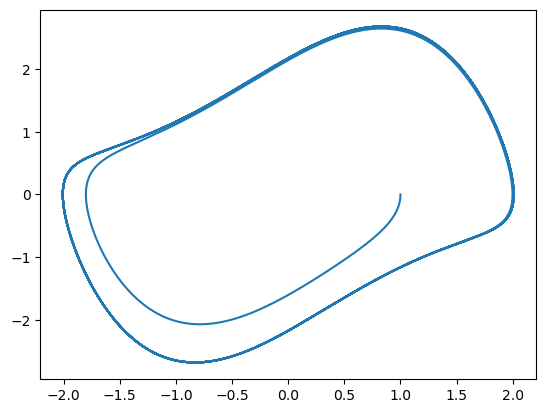

In [85]:
plt.plot(xrk4d,vrk4d)

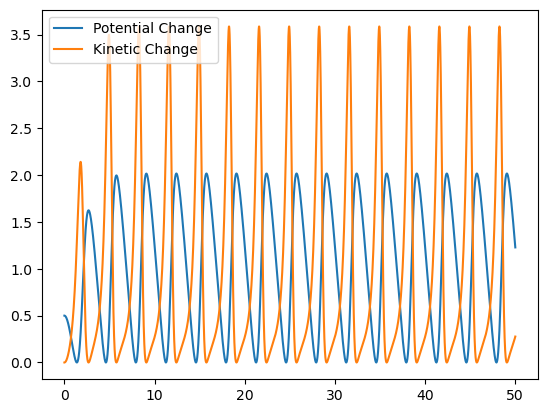

In [86]:
plt.plot(trk4d,0.5*xrk4d**2,label='Potential Change')
plt.plot(trk4d,0.5*vrk4d**2,label='Kinetic Change')
plt.legend()
plt.show()

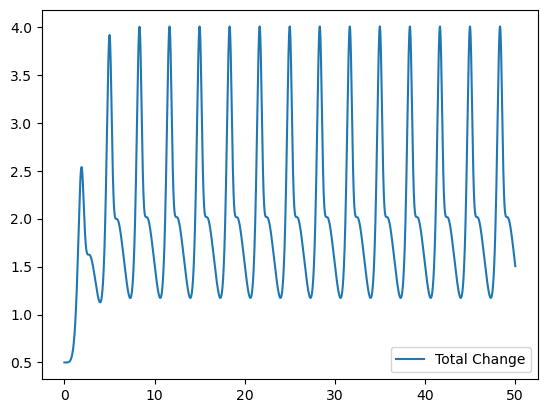

In [87]:

plt.plot(trk4d,0.5*vrk4d**2 + 0.5*xrk4d**2,label='Total Change')
plt.legend()
plt.show()

We will now look at the case where we vary $\alpha$, we will consider $\mu$ and $F$ to be 1 for the analysis below, this is the case for a damped driven oscillator, consider no closed form generalised solutions exist so again numerical integration is crucial.
The differential equation in this case reduces down to :
$\frac{d^2x}{dt^2} - \mu(1-x^2)\frac{dx}{dt} + x =(sin(\alpha t))$


In [88]:
#NEXT STEP: LOOK AT DAMPED DRIVEN
def VDPOD(a,mu,t,X, V):
    dX = V
    dV = mu*(1-X**2)*V - X + 1*np.sin(a*t) 
    return dX, dV
"""Defining the driving function for the van der pol oscillator"""
def RK4_2(f, tf, n, mu, a):
    v = 0
    x = 1
    X_values = []
    V_values = []
    h = tf / n
    tpoints = np.arange(0, tf, h)
    for t in tpoints:
        X_values.append(x)
        V_values.append(v)
        
        k1x, k1v = f(a, mu, t, x, v)
    
        k2x, k2v = f(a, mu, t + h / 2, x + h / 2 * k1x, v + h / 2 * k1v)
    
        k3x, k3v = f(a, mu, t + h / 2, x + h / 2 * k2x, v + h / 2 * k2v)
    
        k4x, k4v = f(a, mu, t + h, x + h * k3x, v + h * k3v)
    
        x += h / 6 * (k1x + 2 * k2x + 2 * k3x + k4x)
        v += h / 6 * (k1v + 2 * k2v + 2 * k3v + k4v)
        
    return tpoints, X_values, V_values
"""Defining RK4 to integrate the driving force factor"""

'Defining RK4 to integrate the driving force factor'

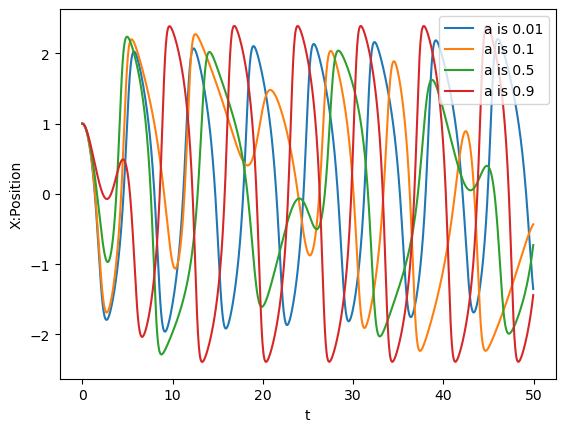

In [89]:
#Analysis for a while mu is 1
As=[0.01,0.1,0.5,0.9]
for a in As:
    trk4dd,xrk4dd,vrk4dd=RK4_2(VDPOD,50,1000,1,a)
    plt.plot(trk4dd,xrk4dd,label=f'a is {a}')
plt.legend()
plt.xlabel('t')
plt.ylabel('X:Position')
plt.show()

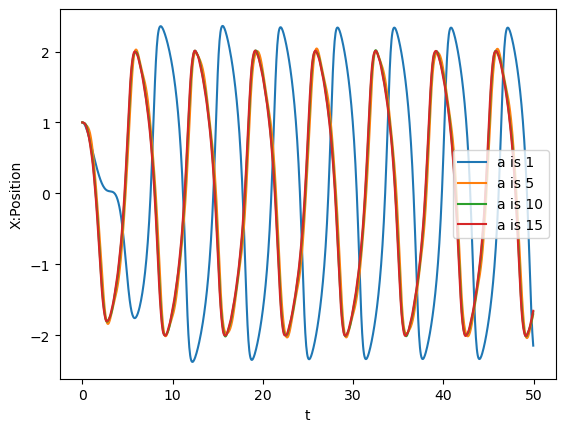

In [90]:
As=[1,5,10,15]
for a in As:
    trk4dd,xrk4dd,vrk4dd=RK4_2(VDPOD,50,1000,1,a)
    plt.plot(trk4dd,xrk4dd,label=f'a is {a}')
plt.legend()
plt.xlabel('t')
plt.ylabel('X:Position')
plt.show()

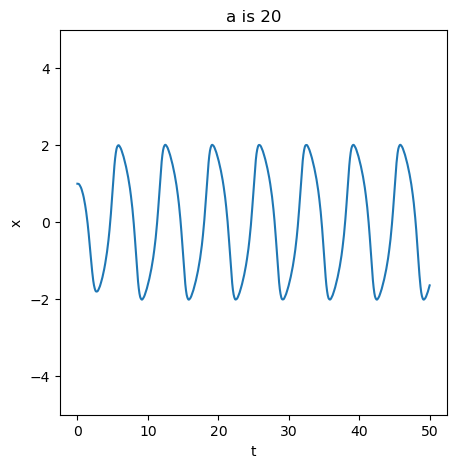

<Figure size 500x500 with 0 Axes>

In [91]:
#Animation as to how a changes while mu is 1:
As=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
fig = plt.figure(figsize=(5,5))
# Generate and save images
for a in As:
    trk4dd,xrk4dd,vrk4dd=RK4_2(VDPOD,50,1000,1,a)
    plt.plot(trk4dd,xrk4dd)
    plt.title(f'a is {a}')
    plt.xlabel('t')
    plt.ylabel('x')
    time.sleep(0.1)
    plt.ylim(-5,5)
    
    clear_output(wait = True)
    display(fig)            # Reset display
    fig.clear()  


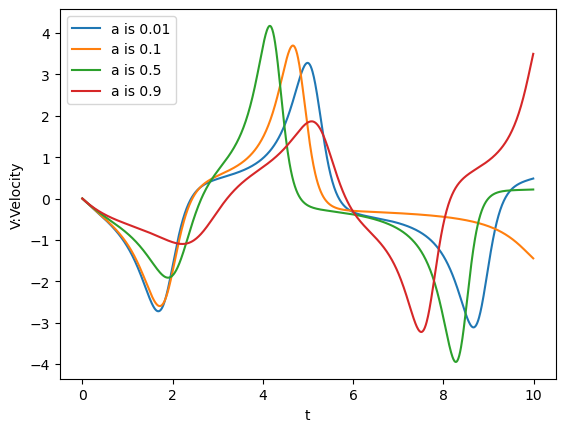

In [92]:
As=[0.01,0.1,0.5,0.9]
for a in As:
    trk4dd,xrk4dd,vrk4dd=RK4_2(VDPOD,10,1000,1.5,a)
    plt.plot(trk4dd,vrk4dd,label=f'a is {a}')
plt.legend()
plt.xlabel('t')
plt.ylabel('V:Velocity')
plt.show()

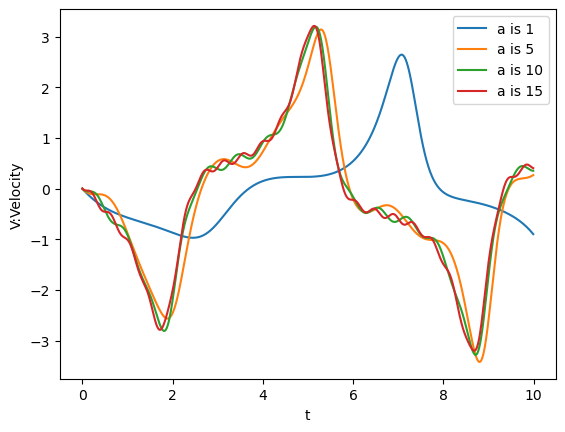

In [93]:
As=[1,5,10,15]
for a in As:
    trk4dd,xrk4dd,vrk4dd=RK4_2(VDPOD,10,1000,1.5,a)
    plt.plot(trk4dd,vrk4dd,label=f'a is {a}')
plt.legend()
plt.xlabel('t')
plt.ylabel('V:Velocity')
plt.show()

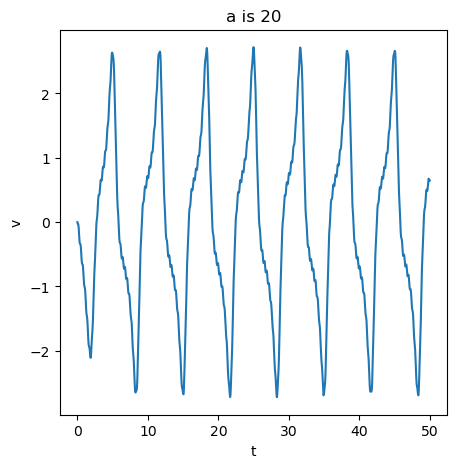

<Figure size 500x500 with 0 Axes>

In [94]:
As=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
fig = plt.figure(figsize=(5,5))
# Generate and save images
for a in As:
    trk4dd,xrk4dd,vrk4dd=RK4_2(VDPOD,50,1000,1,a)
    plt.plot(trk4dd,vrk4dd)
    plt.title(f'a is {a}')
    plt.xlabel('t')
    plt.ylabel('v')
    time.sleep(0.01)
    #plt.ylim(-30,30)
    
    clear_output(wait = True)
    display(fig)            # Reset display
    fig.clear()  


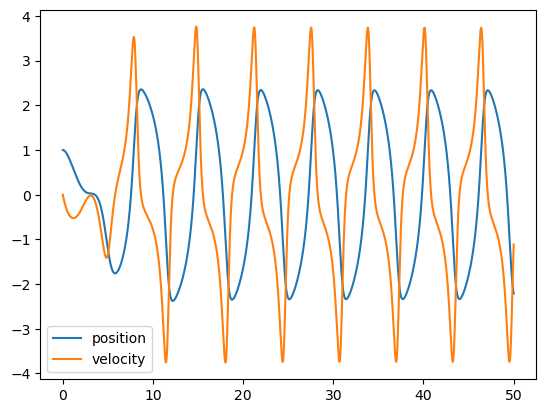

In [95]:
#Doing an enrgy Analysis:
#Looking at only mu=1 a=1
trk4dd,xrk4dd,vrk4dd=np.array(RK4_2(VDPOD,50,100000,1,1))
plt.plot(trk4dd,xrk4dd,label='position')
plt.plot(trk4dd,vrk4dd,label='velocity')
plt.legend()
plt.show()

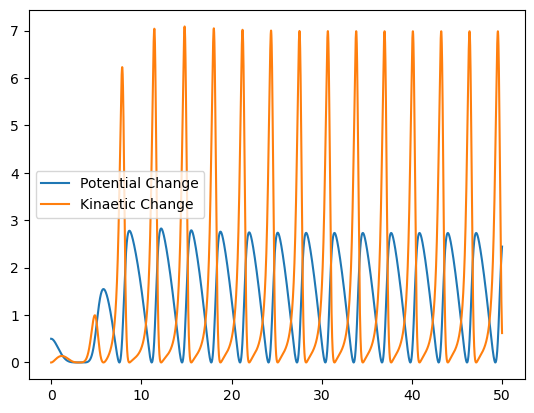

In [96]:
plt.plot(trk4dd,0.5*xrk4dd**2,label='Potential Change')
plt.plot(trk4dd,0.5*vrk4dd**2,label='Kinaetic Change')
plt.legend()
plt.show()

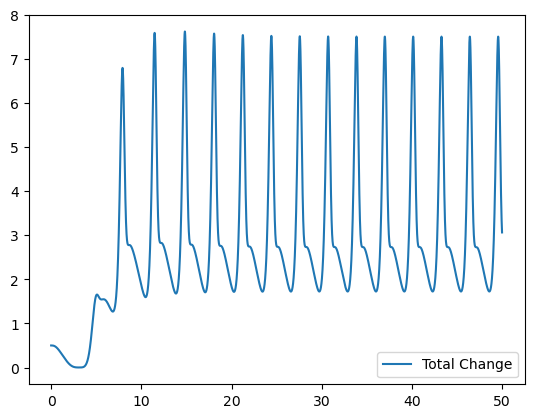

In [97]:
plt.plot(trk4dd,0.5*vrk4dd**2 + 0.5*xrk4dd**2,label='Total Change')
plt.legend()
plt.show()

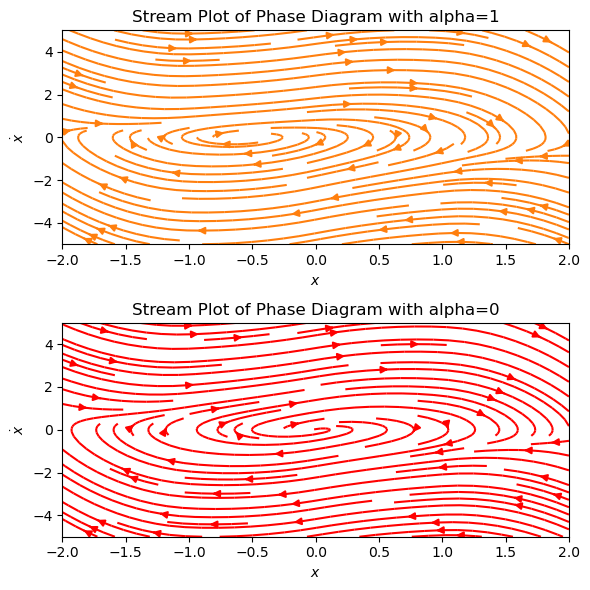

<Figure size 500x500 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [99]:

def generate_phase_space2(t,x_lim, v_lim, grid_size,mu,a):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = VDPOD(a,mu,t,X, V)
    
    return X, V, dX, dV
x_lim = (-2, 2)
v_lim = (-5, 5)
grid_size = 5
mu= 1
a =1
tf = 10
n = 1000
X=[]
V=[]
dX=[]
dV=[]
for i, t in enumerate(np.linspace(0.1, 10, 50)):
    #t = i * tf / n_frames
    x,v,dx,dv = generate_phase_space2(t, x_lim, v_lim, grid_size, mu,a)
    X.append(x)
    V.append(v)
    dX.append(dx)
    dV.append(dv)
    
mu=1
a=0
X2=[]
V2=[]
dX2=[]
dV2=[]
for i, t in enumerate(np.linspace(0.1, 10, 50)):
    #t = i * tf / n_frames
    x,v,dx,dv = generate_phase_space2(t, x_lim, v_lim, grid_size, mu,a)
    X2.append(x)
    V2.append(v)
    dX2.append(dx)
    dV2.append(dv)


fig = plt.figure(figsize=(5,5))

for i, t in enumerate(np.linspace(0.1, 10, 50)):

    fig, axs = plt.subplots(2, 1, figsize=(6, 6))  
    axs[0].streamplot(X[i], V[i], dX[i], dV[i], color='C1')
    axs[0].set_title('Stream Plot of Phase Diagram with alpha=1')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$\dot{x}$')
    
    axs[1].streamplot(X2[i], V2[i], dX2[i], dV2[i], color='red')
    axs[1].set_title('Stream Plot of Phase Diagram with alpha=0')
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\dot{x}$')
    
    plt.tight_layout()
    
    
    
    print('The current value of i is:', i)
    
    time.sleep(0.0001)
    
    clear_output(wait = True)
    display(fig)            # Reset display
    fig.clear()  


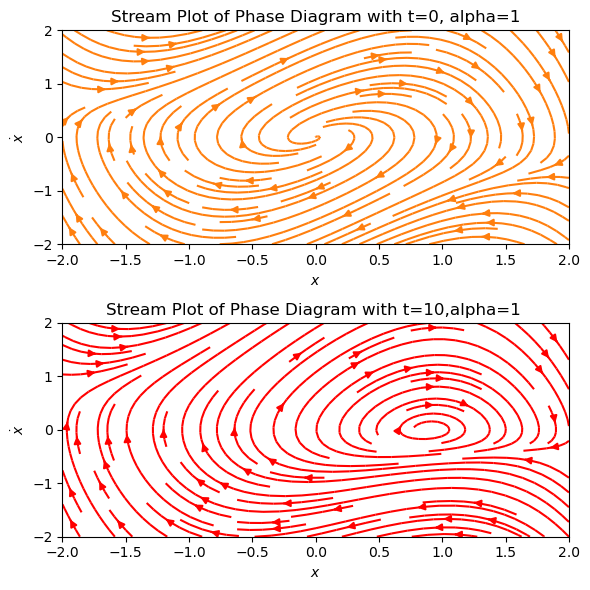

In [101]:
#Alpha not equals to zero at t=1 and t=10
x_lim = (-2, 2)
v_lim = (-2, 2)
grid_size = 20
X, V, dX, dV = generate_phase_space2(0,x_lim, v_lim, grid_size,1,1)
X2, V2, dX2, dV2 = generate_phase_space2(90,x_lim, v_lim, grid_size,1,1)


fig, axs = plt.subplots(2, 1, figsize=(6, 6))  
axs[0].streamplot(X, V, dX, dV, color='C1')
axs[0].set_title('Stream Plot of Phase Diagram with t=0, alpha=1')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$\dot{x}$')
    
axs[1].streamplot(X2, V2, dX2, dV2, color='red')
axs[1].set_title('Stream Plot of Phase Diagram with t=10,alpha=1 ')
axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel(r'$\dot{x}$')
    
plt.tight_layout()
    

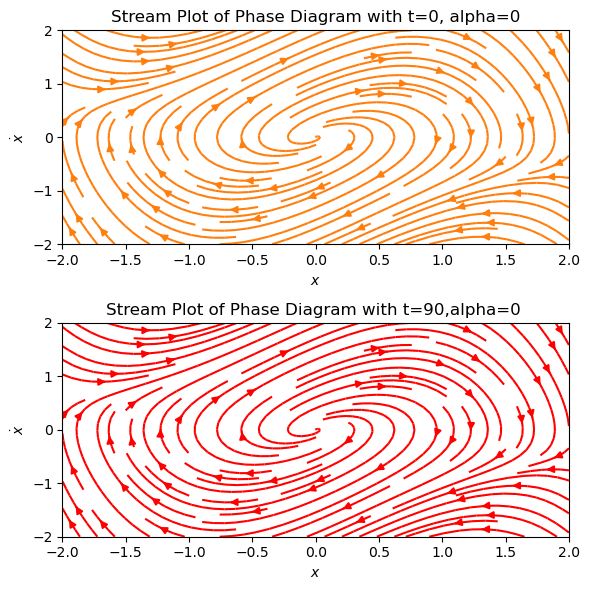

In [102]:
#Alpha not equals to zero at t=1 and t=10

x_lim = (-2, 2)
v_lim = (-2, 2)
grid_size = 20
X, V, dX, dV = generate_phase_space2(0,x_lim, v_lim, grid_size,1,0)
X2, V2, dX2, dV2 = generate_phase_space2(90,x_lim, v_lim, grid_size,1,0)


fig, axs = plt.subplots(2, 1, figsize=(6, 6))  
axs[0].streamplot(X, V, dX, dV, color='C1')
axs[0].set_title('Stream Plot of Phase Diagram with t=0, alpha=0')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$\dot{x}$')
    
axs[1].streamplot(X2, V2, dX2, dV2, color='red')
axs[1].set_title('Stream Plot of Phase Diagram with t=90,alpha=0 ')
axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel(r'$\dot{x}$')
    
plt.tight_layout()
    

##  Results and Discussion
Now as we draw conclusions lets decide which numerical integeration method was the best, For this I will look at the analytical solution vs all the other 6 solutions produced by the numerical methods and the their difference from the analytical solutions. To start off I plotted the analytical and numerical results together. These results overlap perfectly which shows all the numerical solutions work perfectly qualitatively. But to further probe into the accuracy I calculated the difference of the nuemrical vs analytical solution. Ideally it should converge to zero, so lets see if that actually does happen.

C:\Users\49176\AppData\Local\Temp\ipykernel_30116\4190554135.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('480-Graph1.png')


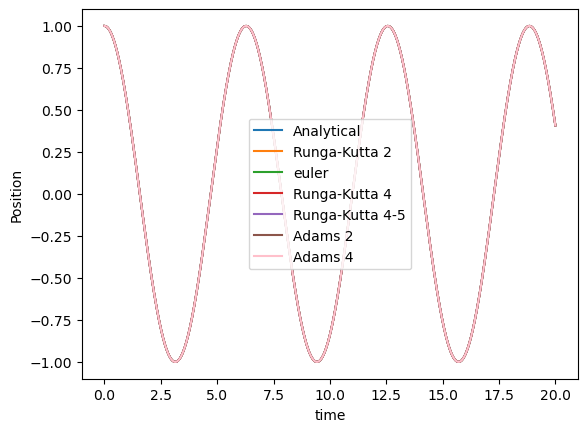

In [136]:
t=np.arange(0,20,20/1000000)
plt.plot(t,np.cos(t),label='Analytical')
plt.plot(t,xrkut,label='Runga-Kutta 2')
plt.plot(t,xe,label='euler')
plt.plot(trk4,xrk4,label='Runga-Kutta 4')
plt.plot(trk45,xrk45,label='Runga-Kutta 4-5')
plt.plot(t,xab2,label='Adams 2')
plt.plot(t,xab4,label='Adams 4',color='pink')
plt.xlabel('time')
plt.ylabel('Position')
plt.legend()
plt.savefig('480-Graph1.png')
plt.show()

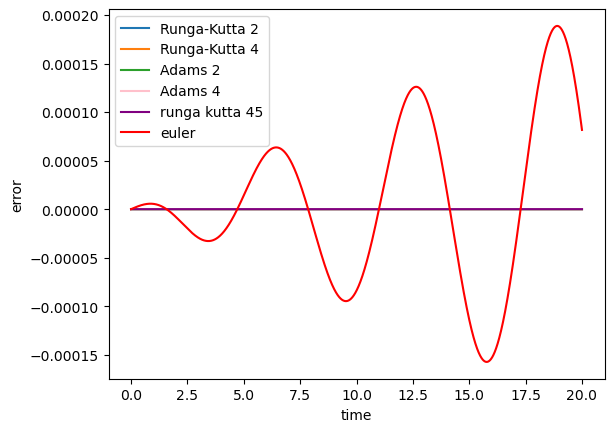

In [137]:
Act=np.cos(t)
plt.plot(t,xrkut-Act,label='Runga-Kutta 2')
plt.plot(t,xrk4-Act,label='Runga-Kutta 4')
plt.plot(t,xab2-Act,label='Adams 2')
plt.plot(t,xab4-Act,label='Adams 4',color='pink')
plt.plot(trk45,xrk45-np.cos(trk45),label='runga kutta 45',color='purple')
plt.plot(t,xe-Act,label='euler',color='red')
plt.xlabel('time')
plt.ylabel('error')
plt.legend()
plt.savefig('480-Graph2.png')

As we can see Euler adds energy to the system and does not work well at all, so we eliminate this method. Let's zoom in the graph a little bit more.

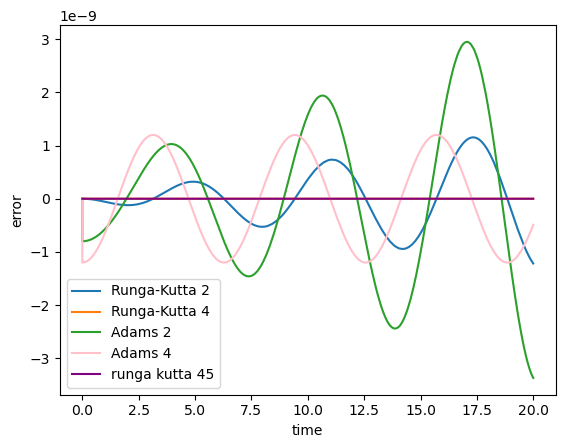

In [138]:


plt.plot(t,xrkut-Act,label='Runga-Kutta 2')
plt.plot(t,xrk4-Act,label='Runga-Kutta 4')
plt.plot(t,xab2-Act,label='Adams 2')
plt.plot(t,xab4-Act,label='Adams 4',color='pink')
plt.plot(trk45,xrk45-np.cos(trk45),label='runga kutta 45',color='purple')
plt.xlabel('time')
plt.ylabel('error')
plt.legend()
plt.savefig('480-Graph3.png')

As we see RK45 and RK4 works super well, After Euler Adams 2 is the worst and Adams4 and RK2 work similarly but Adams 4 like euler adds energy to the system. So lets zoom in further to see the error of RK4 and RK45

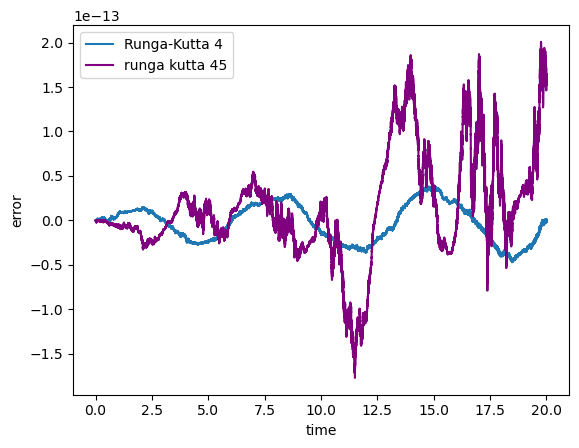

In [139]:
plt.plot(t,xrk4-Act,label='Runga-Kutta 4')
plt.plot(trk45,xrk45-np.cos(trk45),label='runga kutta 45',color='purple')
plt.xlabel('time')
plt.ylabel('error')
plt.legend()
plt.savefig('480-Graph4.png')

Although both methods qualitatively work very well as the error is on the order of e-13 however RK4 does seem to work slightly better as it is a non chaotic stable system. So the from these graphs we can determine that RK4 works best. Now lets look at these statistics quantitatively and determine the best method by looking at the mean and max error.

In [107]:
#MEAN ERROR CALCULATION
mean_errors = {
    "Runga-kutta-2": np.mean(np.abs(xrkut-Act)),
    "Runga-kutta-4": np.mean(np.abs(xrk4-Act)),
    "Runga-kutta-45": np.mean(np.abs(xrk45-np.cos(trk45))),
    "Adams-Bashforth-2": np.mean(np.abs(xab2-Act)),
    "Adams-Bashforth-4": np.mean(np.abs(xab4-Act)),
    "Euler": np.mean(np.abs(xe-Act))
}
mean_errors

{'Runga-kutta-2': 4.156700765134582e-10,
 'Runga-kutta-4': 1.8397444364399766e-14,
 'Runga-kutta-45': 4.210915373792738e-14,
 'Adams-Bashforth-2': 1.2109266181654465e-09,
 'Adams-Bashforth-4': 7.747936771323581e-10,
 'Euler': 6.538656996656807e-05}

In [108]:
#Max errors:
max_errors = {
    "Runga-kutta-2": np.max(np.abs(xrkut-Act)),
    "Runga-kutta-4": np.max(np.abs(xrk4-Act)),
    "Runga-kutta-45": np.max(np.abs(xrk45-np.cos(trk45))),
    "Adams-Bashforth-2": np.max(np.abs(xab2-Act)),
    "Adams-Bashforth-4": np.max(np.abs(xab4-Act)),
    "Euler": np.max(np.abs(xe-Act))
}
max_errors

{'Runga-kutta-2': 1.2172624019868294e-09,
 'Runga-kutta-4': 4.729550084903167e-14,
 'Runga-kutta-45': 2.007283228522283e-13,
 'Adams-Bashforth-2': 3.369624801408122e-09,
 'Adams-Bashforth-4': 1.2000407334511465e-09,
 'Euler': 0.0001887781114034981}

So, the graphs, the mean error and the absolute maximum error both show that the best integration method was runga-kutta 4 as its mean and max error was both on the order of e-14.So this method was used for the rest of the calculation. To investigae the mu and alpha dependance.
For the mu dependance let us consider how does the phase diagram, velocity vs time dependance and position vs time dependance change as we vary the mu parameter.

Let us consider the case where $\alpha=0$ and vary $\mu$. The ODE for this case is:

$\frac{d^2x}{dt^2} - \mu(1-x^2)\frac{dx}{dt} +\beta x =0$

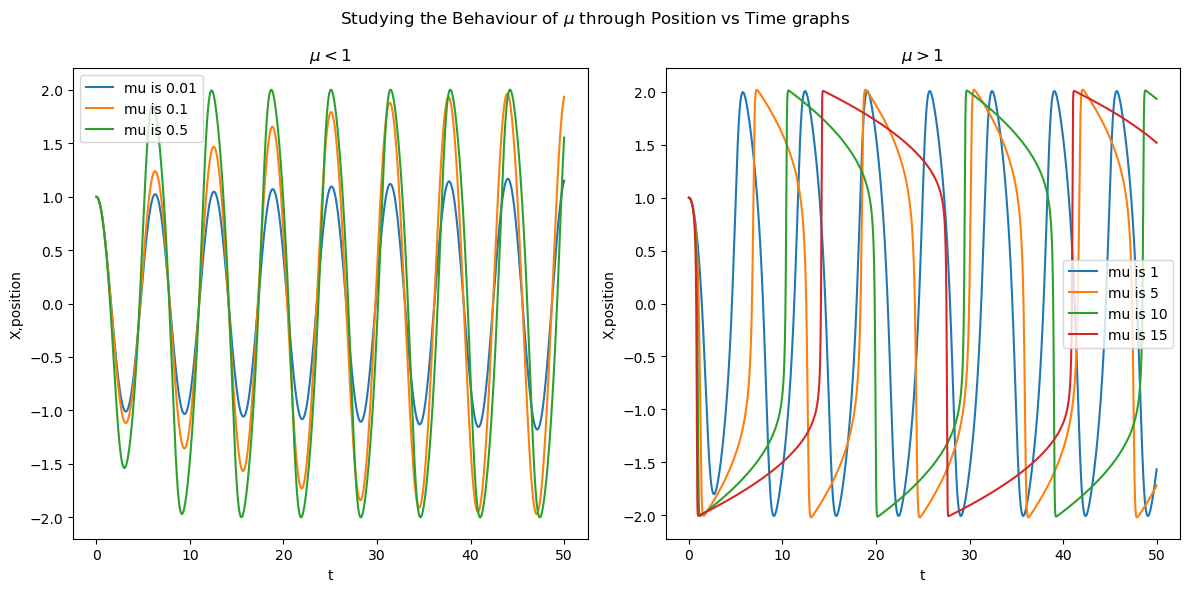

In [127]:
#Looking at various values of mu for mu less than 1 and greater than 1

fig, axs = plt.subplots(1, 2, figsize=(12, 6))  
mus=[0.01,0.1,0.5]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,50,100000,mu)
    axs[0].plot(trk4d,xrk4d,label=f'mu is {mu}')
axs[0].legend()
axs[0].set_xlabel('t')
axs[0].set_ylabel('X,position')
axs[0].set_title(r'$\mu<1$')

mus=[1,5,10,15]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,50,100000,mu)
    axs[1].plot(trk4d,xrk4d,label=f'mu is {mu}')
axs[1].legend()
axs[1].set_xlabel('t')
axs[1].set_ylabel('X,position')
axs[1].set_title(r'$\mu>1$ ')

plt.suptitle(r'Studying the Behaviour of $\mu$ through Position vs Time graphs ')    
plt.tight_layout()
plt.savefig('480-Graph5.png')

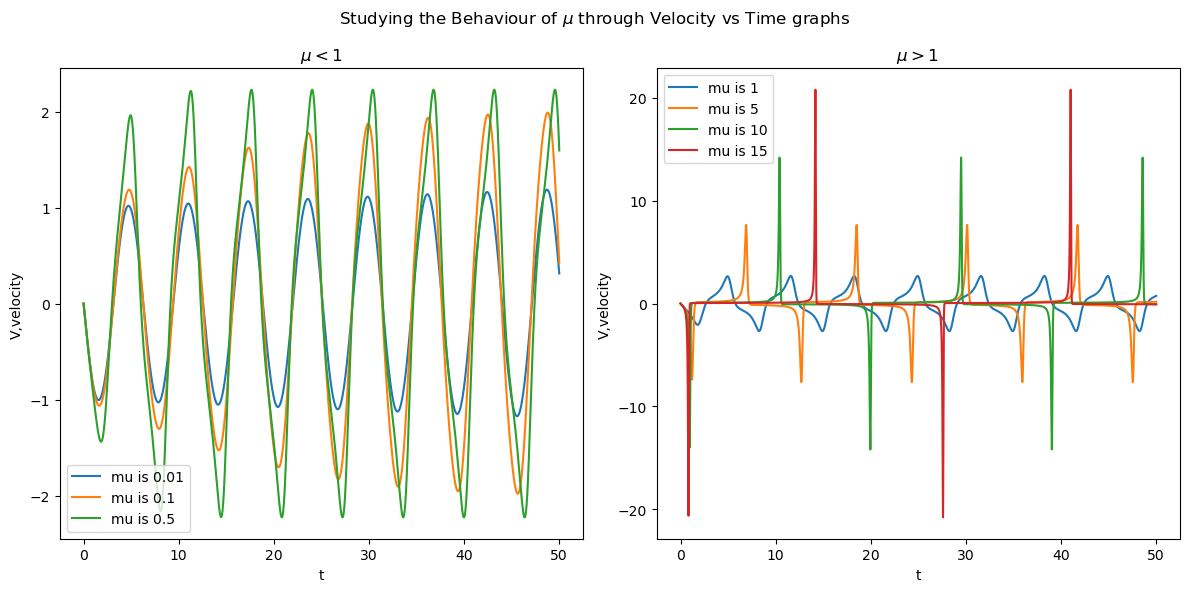

In [128]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  
mus=[0.01,0.1,0.5]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,50,100000,mu)
    axs[0].plot(trk4d,vrk4d,label=f'mu is {mu}')
axs[0].legend()
axs[0].set_xlabel('t')
axs[0].set_ylabel('V,velocity')
axs[0].set_title(r'$\mu<1$')

mus=[1,5,10,15]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,50,100000,mu)
    axs[1].plot(trk4d,vrk4d,label=f'mu is {mu}')
axs[1].legend()
axs[1].set_xlabel('t')
axs[1].set_ylabel('V,velocity')
axs[1].set_title(r'$\mu>1$ ')

plt.suptitle(r'Studying the Behaviour of $\mu$ through Velocity vs Time graphs ')    
plt.tight_layout()
plt.savefig('480-Graph6.png')

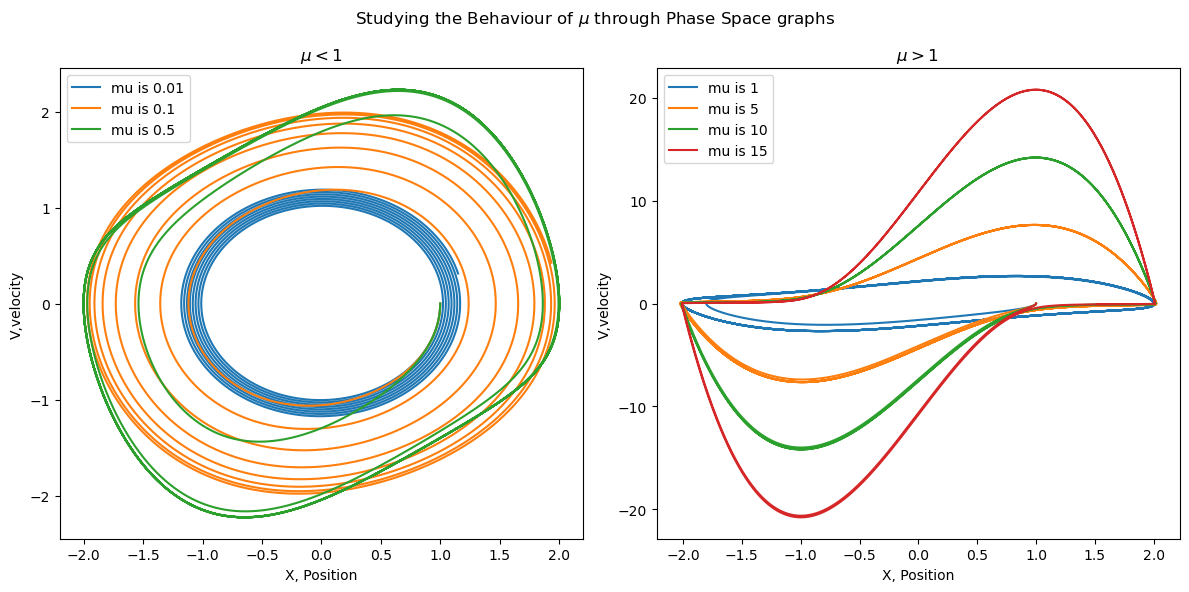

In [129]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  
mus=[0.01,0.1,0.5]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,50,100000,mu)
    axs[0].plot(xrk4d,vrk4d,label=f'mu is {mu}')
axs[0].legend()
axs[0].set_xlabel('X, Position')
axs[0].set_ylabel('V,velocity')
axs[0].set_title(r'$\mu<1$')

mus=[1,5,10,15]
for mu in mus:
    trk4d,xrk4d,vrk4d=RK4(VDPO,50,100000,mu)
    axs[1].plot(xrk4d,vrk4d,label=f'mu is {mu}')
axs[1].legend()
axs[1].set_xlabel('X, Position')
axs[1].set_ylabel('V,velocity')
axs[1].set_title(r'$\mu>1$ ')

plt.suptitle(r'Studying the Behaviour of $\mu$ through Phase Space graphs ')    
plt.tight_layout()
plt.savefig('480-Graph7.png')

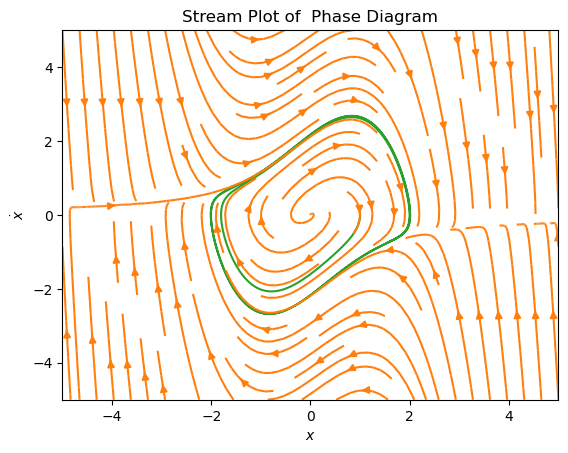

In [130]:
x_lim = (-5, 5)
v_lim = (-5, 5)
grid_size = 20
X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size,1)
t,x,v=RK4(VDPO,20,100000,1)

plt.plot(x,v, label='Sample trajectory', c='C2')
plt.streamplot(X, V, dX, dV, color='C1')
plt.title('Stream Plot of  Phase Diagram')
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x}$');
plt.savefig('480-Graph8.png')

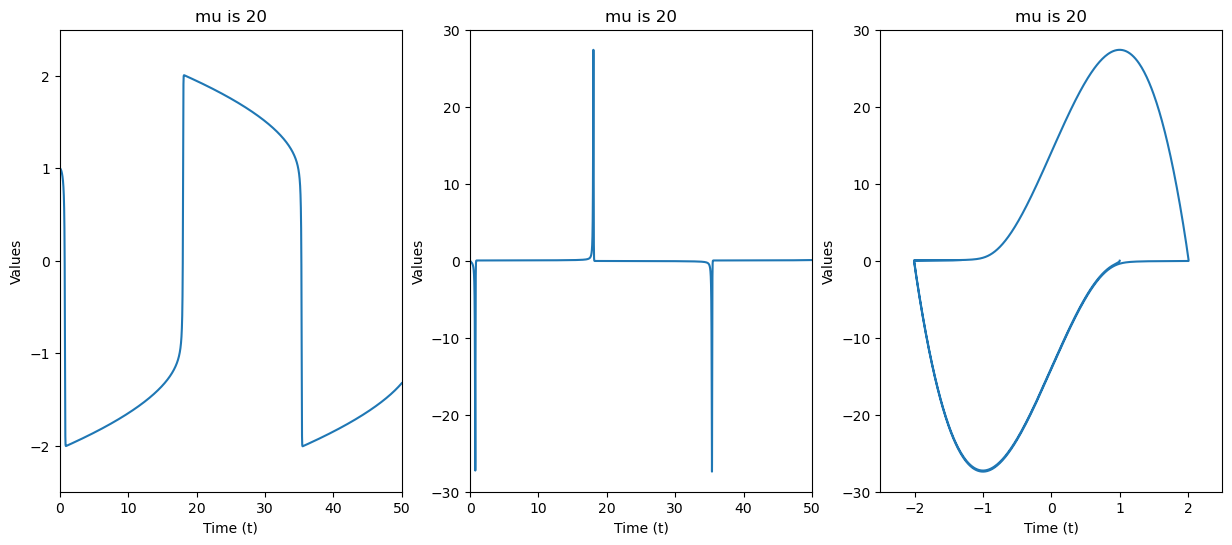

In [114]:
mus = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
# Create an empty figure
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

# Define empty lines for each subplot
line_x, = axs[0].plot([], [], label='x vs t')
line_v, = axs[1].plot([], [], label='v vs t')
line_vx, = axs[2].plot([], [], label='v vs x')

# Set common titles and labels for all subplots
for ax in axs:
    ax.set_xlabel('Time (t)')
    ax.set_ylabel('Values')

# Create a function to update the plot
def update_plot(mu):
    trk4d, xrk4d, vrk4d = RK4(VDPO, 50, 100000, mu)
    
    # Update x vs t plot
    line_x.set_data(trk4d, xrk4d)
    axs[0].set_title(f'mu is {mu}')

    # Update v vs t plot
    line_v.set_data(trk4d, vrk4d)
    axs[1].set_title(f'mu is {mu}')

    # Update v vs x plot
    line_vx.set_data(xrk4d, vrk4d)
    axs[2].set_title(f'mu is {mu}')

    # Set plot limits
    axs[0].set_ylim(-2.5, 2.5)
    axs[1].set_ylim(-30, 30)
    axs[2].set_ylim(-30, 30)
    axs[0].set_xlim(0, 50)
    axs[1].set_xlim(0, 50)
    axs[2].set_xlim(-2.5, 2.5)


    # Return lines for FuncAnimation
    return line_x, line_v, line_vx

# Create the animation
ani = FuncAnimation(fig, update_plot, frames=mus, interval=600, blit=True)

# Save the animation as GIF
ani_file_name = 'animation.gif'
ani.save(ani_file_name, writer='pillow')

# Display the animation
plt.show()


From looking at the graphs and the animations above we can deduce that as $\mu$ is less than 1 both the position and the velocity maximas approach 1 for this choice of initial conditions. when $\mu>1$ The position seems stable at a certain amplitude but the velocity increseases as we increase $\mu$ as shown by the phase graphs , for high values of $\mu$ the system approaches its limit and no longer portrays the sinosuidal oscillatory behaviour.The stable phase space graph shows that the behaviour of the system is independanmt of the initial conditions of velocity and position.

Now that we have qualitatively looked at the $\mu$ dependance lets consider the $\alpha$ dependance. The ODE will be:

$\frac{d^2x}{dt^2} - \mu(1-x^2)\frac{dx}{dt} + x =(sin(\alpha t))$


In [117]:
print(1)

1


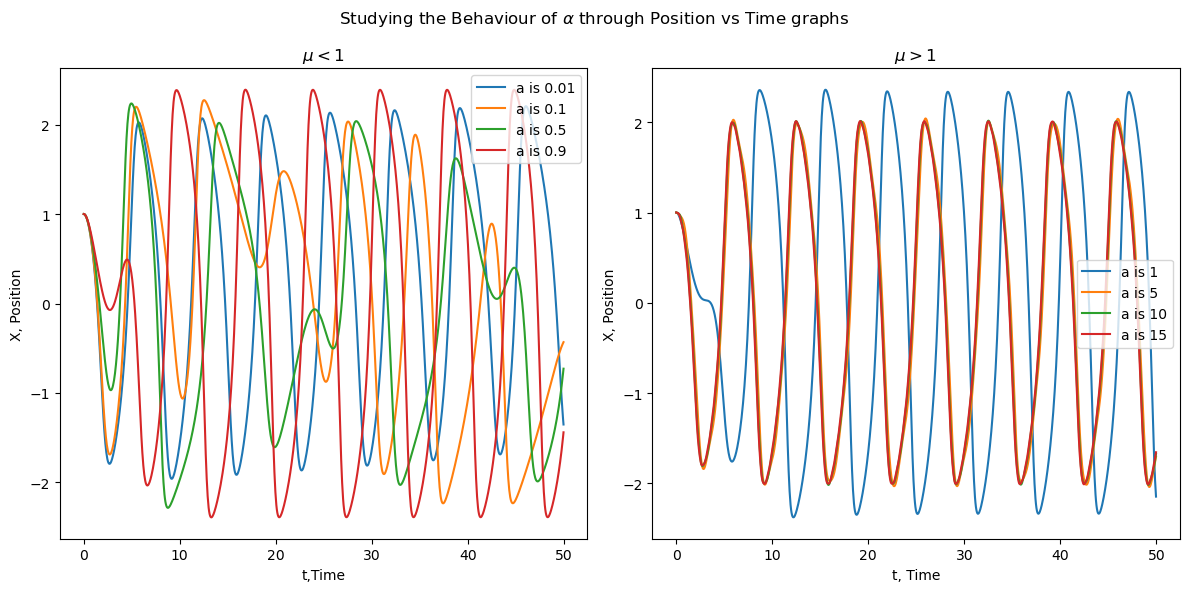

In [131]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6)) 
As=[0.01,0.1,0.5,0.9]
for a in As:
    trk4dd,xrk4dd,vrk4dd=RK4_2(VDPOD,50,1000,1,a)
    axs[0].plot(trk4dd,xrk4dd,label=f'a is {a}')
axs[0].legend()
axs[0].set_ylabel('X, Position')
axs[0].set_xlabel('t,Time')
axs[0].set_title(r'$\mu<1$')

As=[1,5,10,15]
for a in As:
    trk4dd,xrk4dd,vrk4dd=RK4_2(VDPOD,50,1000,1,a)
    axs[1].plot(trk4dd,xrk4dd,label=f'a is {a}')    
axs[1].legend()
axs[1].set_ylabel('X, Position')
axs[1].set_xlabel('t, Time')
axs[1].set_title(r'$\mu>1$ ')

plt.suptitle(r'Studying the Behaviour of $\alpha$ through Position vs Time graphs ')    
plt.tight_layout()
plt.savefig('480-Graph9.png')
plt.show()

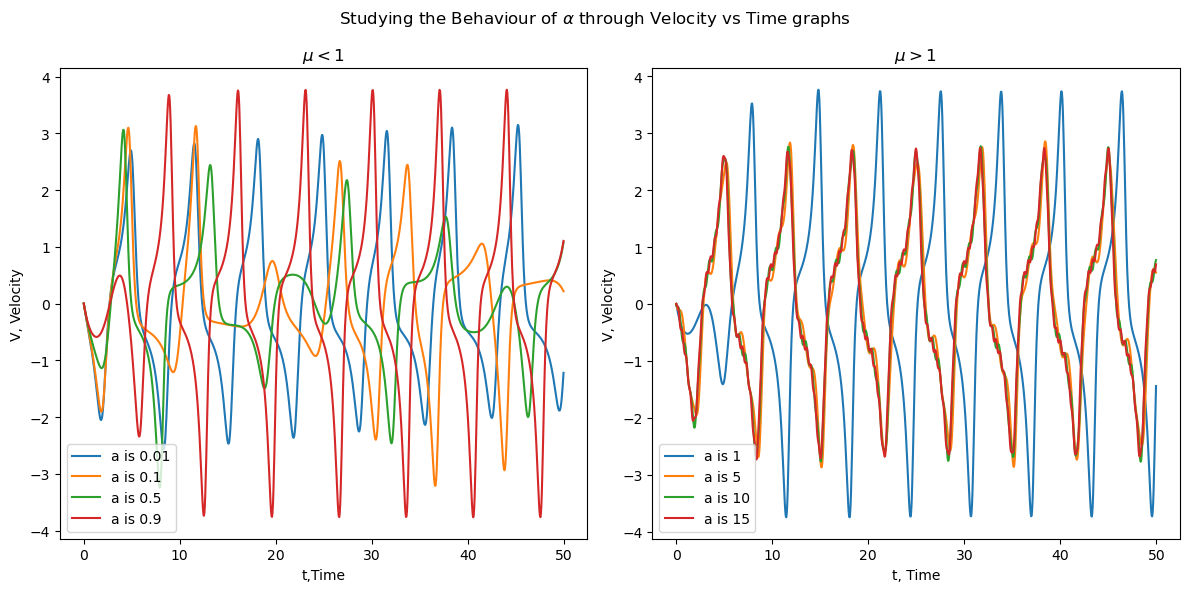

In [132]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6)) 
As=[0.01,0.1,0.5,0.9]
for a in As:
    trk4dd,xrk4dd,vrk4dd=RK4_2(VDPOD,50,1000,1,a)
    axs[0].plot(trk4dd,vrk4dd,label=f'a is {a}')
axs[0].legend()
axs[0].set_ylabel('V, Velocity')
axs[0].set_xlabel('t,Time')
axs[0].set_title(r'$\mu<1$')

As=[1,5,10,15]
for a in As:
    trk4dd,xrk4dd,vrk4dd=RK4_2(VDPOD,50,1000,1,a)
    axs[1].plot(trk4dd,vrk4dd,label=f'a is {a}')    
axs[1].legend()
axs[1].set_ylabel('V, Velocity')
axs[1].set_xlabel('t, Time')
axs[1].set_title(r'$\mu>1$ ')

plt.suptitle(r'Studying the Behaviour of $\alpha$ through Velocity vs Time graphs ')    
plt.tight_layout()
plt.savefig('480-Graph10.png')
plt.show()

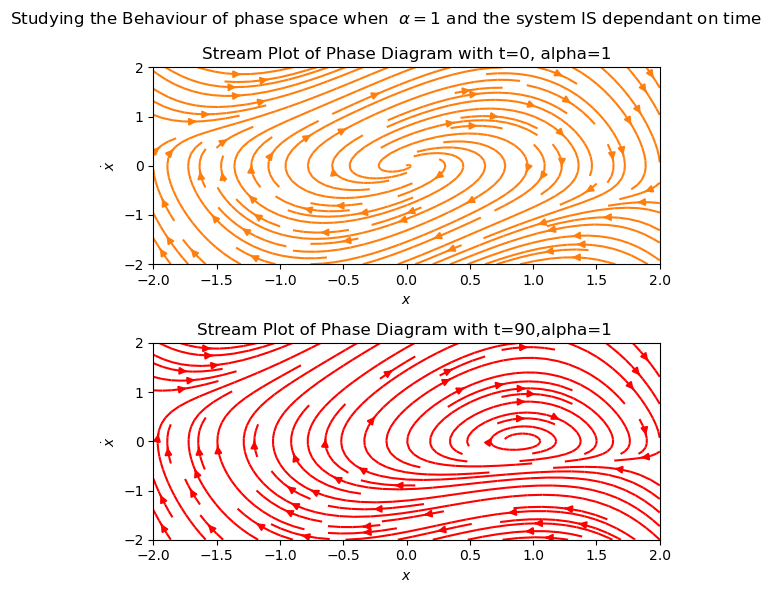

In [133]:
#Studying the change of Phase speace graphs as they are dependant on alpha due to the time depndance
x_lim = (-2, 2)
v_lim = (-2, 2)
grid_size = 20
X, V, dX, dV = generate_phase_space2(0,x_lim, v_lim, grid_size,1,1)
X2, V2, dX2, dV2 = generate_phase_space2(90,x_lim, v_lim, grid_size,1,1)


fig, axs = plt.subplots(2, 1, figsize=(6, 6))  
axs[0].streamplot(X, V, dX, dV, color='C1')
axs[0].set_title('Stream Plot of Phase Diagram with t=0, alpha=1')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$\dot{x}$')
    
axs[1].streamplot(X2, V2, dX2, dV2, color='red')
axs[1].set_title('Stream Plot of Phase Diagram with t=90,alpha=1 ')
axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel(r'$\dot{x}$')

plt.suptitle(r'Studying the Behaviour of phase space when  $\alpha=1$ and the system IS dependant on time')    
    
plt.tight_layout()
plt.savefig('480-Graph11.png')

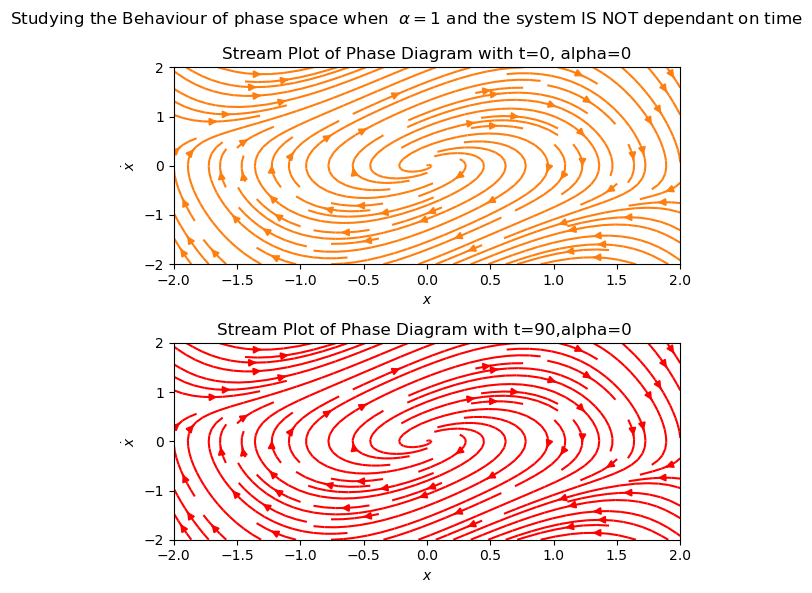

In [134]:
x_lim = (-2, 2)
v_lim = (-2, 2)
grid_size = 20
X, V, dX, dV = generate_phase_space2(0,x_lim, v_lim, grid_size,1,0)
X2, V2, dX2, dV2 = generate_phase_space2(90,x_lim, v_lim, grid_size,1,0)


fig, axs = plt.subplots(2, 1, figsize=(6, 6))  
axs[0].streamplot(X, V, dX, dV, color='C1')
axs[0].set_title('Stream Plot of Phase Diagram with t=0, alpha=0')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$\dot{x}$')
    
axs[1].streamplot(X2, V2, dX2, dV2, color='red')
axs[1].set_title('Stream Plot of Phase Diagram with t=90,alpha=0 ')
axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel(r'$\dot{x}$')

plt.suptitle(r'Studying the Behaviour of phase space when  $\alpha=1$ and the system IS NOT dependant on time')    
    
    
plt.tight_layout()
plt.savefig('480-Graph12.png')

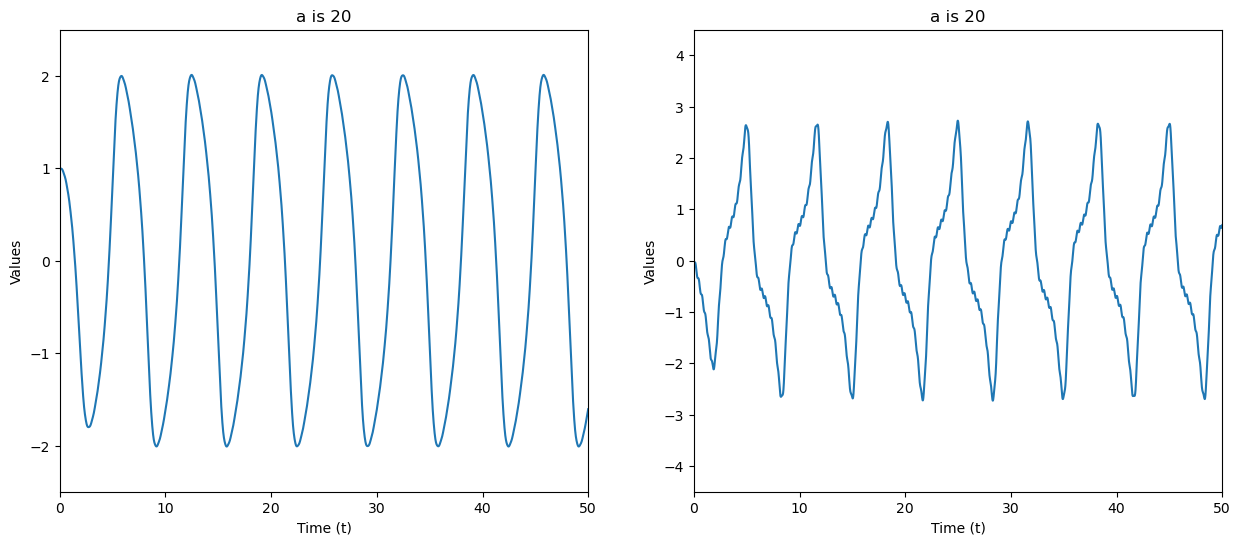

In [60]:
As=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Define empty lines for each subplot
line_x, = axs[0].plot([], [], label='x vs t')
line_v, = axs[1].plot([], [], label='v vs t')


# Set common titles and labels for all subplots
for ax in axs:
    ax.set_xlabel('Time (t)')
    ax.set_ylabel('Values')

# Create a function to update the plot
def update_plot(a):
    trk4dd, xrk4dd, vrk4dd = RK4_2(VDPOD, 50, 100000, 1,a)
    
    # Update x vs t plot
    line_x.set_data(trk4dd, xrk4dd)
    axs[0].set_title(f'a is {a}')

    # Update v vs t plot
    line_v.set_data(trk4dd, vrk4dd)
    axs[1].set_title(f'a is {a}')

    

    # Set plot limits
    axs[0].set_ylim(-2.5, 2.5)
    axs[1].set_ylim(-4.5, 4.5)
  
    axs[0].set_xlim(0, 50)
    axs[1].set_xlim(0, 50)
  


    # Return lines for FuncAnimation
    return line_x, line_v

# Create the animation
ani = FuncAnimation(fig, update_plot, frames=As, interval=600, blit=True)

# Save the animation as GIF
ani_file_name = 'animation1.gif'
ani.save(ani_file_name, writer='pillow')

# Display the animation
plt.show()


In [66]:

from PIL import Image


# Create a folder to save frames
frames_folder = 'frames'
os.makedirs(frames_folder, exist_ok=True)



def generate_phase_space(t,x_lim, v_lim, grid_size,mu,a):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = VDPOD(a,mu,t,X, V)
    
    return X, V, dX, dV
x_lim = (-2, 2)
v_lim = (-5, 5)
grid_size = 5
mu= 1
a =1
tf = 10
n = 100
X=[]
V=[]
dX=[]
dV=[]
for i, t in enumerate(np.linspace(0.1, 10, 100)):
    #t = i * tf / n_frames
    x,v,dx,dv = generate_phase_space(t, x_lim, v_lim, grid_size, mu,a)
    X.append(x)
    V.append(v)
    dX.append(dx)
    dV.append(dv)
    
mu=1
a=0
X2=[]
V2=[]
dX2=[]
dV2=[]
for i, t in enumerate(np.linspace(0.1, 10, 100)):
    #t = i * tf / n_frames
    x,v,dx,dv = generate_phase_space(t, x_lim, v_lim, grid_size, mu,a)
    X2.append(x)
    V2.append(v)
    dX2.append(dx)
    dV2.append(dv)


fig = plt.figure(figsize=(5,5))

for i, t in enumerate(np.linspace(0.1, 10, 100)):

    fig, axs = plt.subplots(2, 1, figsize=(6, 6))  
    axs[0].streamplot(X[i], V[i], dX[i], dV[i], color='C1')
    axs[0].set_title('Stream Plot of Phase Diagram with alpha=1')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$\dot{x}$')
    
    axs[1].streamplot(X2[i], V2[i], dX2[i], dV2[i], color='red')
    axs[1].set_title('Stream Plot of Phase Diagram with alpha=0')
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\dot{x}$')
    
    plt.tight_layout()
    
    
    
    
    # Save the plot as an image
    filename = os.path.join(frames_folder, f"frame_{i:03d}.png")
    plt.savefig(filename)
    plt.close(fig)
    
    clear_output(wait=True)
    print('Frame', i+1, 'of', n, 'saved.')



Frame 100 of 100 saved.


<Figure size 500x500 with 0 Axes>

In [67]:
def create_gif(frames_folder, gif_filename, duration=100):
    frames = []
    # Load all frames
    for filename in sorted(os.listdir(frames_folder)):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            frames.append(Image.open(os.path.join(frames_folder, filename)))

    # Save as GIF
    frames[0].save(gif_filename, save_all=True, append_images=frames[1:], optimize=False, duration=duration, loop=0)
gif_filename = 'movie.gif'
duration = 100  # milliseconds per frame

create_gif(frames_folder, gif_filename, duration)

print('GIF created successfully!')



GIF created successfully!


For the qualitative analysis of $\alpha$ we deduced that the position and velocity limit does not change drastically unlike in the $\mu$ analysis. However as we increase the value of $\alpha$ the system does eem to stabilise and does not seem to react to the changes. Another really interesting result of this analysis is deeing how tyhe phase space changes with respect to time when $\alpha$ is not 0, this makes sense as the ODE has a time dependance so the behaviour of the system continously changes as we vary the values.

Energy analysis for $\mu$ and $\alpha$ equals 1, I am doing this analysis just for fun, Due to the time limit and unexciting predicatable results I will not be including this in my presentation and report.

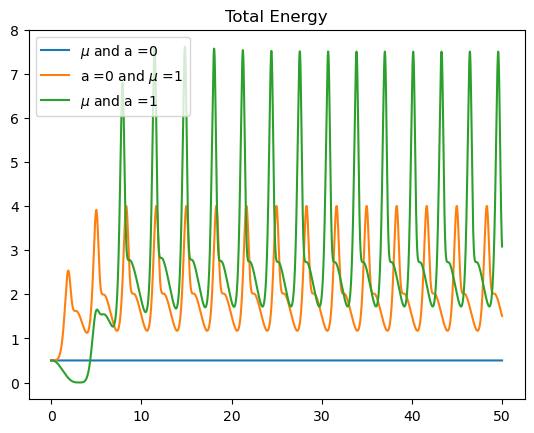

In [226]:
tdd,xdd,vdd=np.array(RK4_2(VDPOD,50,10000,1,1))
td,xd,vd=np.array(RK4_2(VDPOD,50,10000,1,0))
t,x,v=np.array(RK4_2(VDPOD,50,10000,0,0))
#Total Energy
plt.plot(t, 0.5*x**2 + 0.5*v**2,label=r'$\mu$ and a =0 ')
plt.plot(t, 0.5*xd**2 + 0.5*vd**2,label=r'a =0 and $\mu$ =1 ')
plt.plot(t, 0.5*xdd**2 + 0.5*vdd**2,label=r'$\mu$ and a =1 ')
plt.title('Total Energy')
plt.legend()
plt.show()

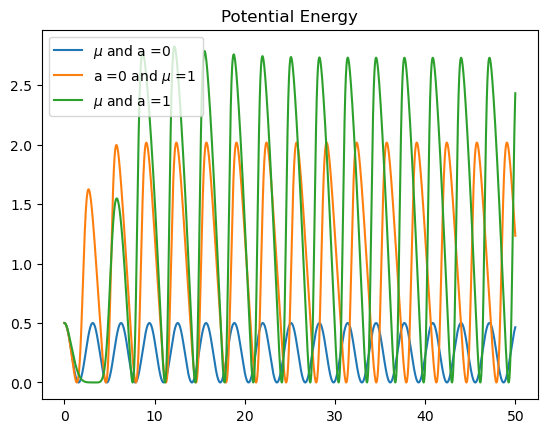

In [227]:
tdd,xdd,vdd=np.array(RK4_2(VDPOD,50,10000,1,1))
td,xd,vd=np.array(RK4_2(VDPOD,50,10000,1,0))
t,x,v=np.array(RK4_2(VDPOD,50,10000,0,0))
#Total Energy
plt.plot(t, 0.5*x**2 ,label=r'$\mu$ and a =0 ')
plt.plot(t, 0.5*xd**2 ,label=r'a =0 and $\mu$ =1 ')
plt.plot(t, 0.5*xdd**2 ,label=r'$\mu$ and a =1 ')
plt.title('Potential Energy')
plt.legend()
plt.show()

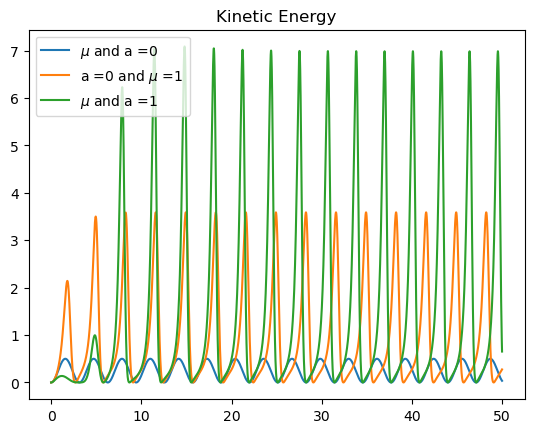

In [228]:
tdd,xdd,vdd=np.array(RK4_2(VDPOD,50,10000,1,1))
td,xd,vd=np.array(RK4_2(VDPOD,50,10000,1,0))
t,x,v=np.array(RK4_2(VDPOD,50,10000,0,0))
plt.plot(t, 0.5*v**2 ,label=r'$\mu$ and a =0 ')
plt.plot(t, 0.5*vd**2 ,label=r'a =0 and $\mu$ =1 ')
plt.plot(t, 0.5*vdd**2 ,label=r'$\mu$ and a =1 ')
plt.title('Kinetic Energy')
plt.legend()
plt.show()

We can see that for the case where $\mu$ and $\alpha$ are 0 the SHO case the total energy is conserved however for the damped case where only $\mu$ is not zero energy seems to be added to the system plus when both $\mu$ and $\alpha$ are not 0, even more energy seems to be added to the system and one can say that energy is not conserved.

##  Conclusion and Perspectives


## Conclusion and Result:
Throughout this exploration I was sucessfully able to investigate the questions I set to out to answer. My final conclusion for the three questions is as follows:

- Out of the six numerical integration methods, for the time step range of 1,000,000 (excluding RK45), Runga Kutta 4 proved to be the most accurate as it was the closest to the analytical solution for the Non-damped non driven simple harmonic case. This outcome was supported not only by the the qualitative graphs but also the mean and max error where the error range of RK4 was in the order of e-14. Through this analyis I was able to determine that RK4 was the best numerical method out of the 6 I considered and that paved the way for my analyis of the $\mu$ and $\alpha$  parameters.

- For the qaulitative analyis of the $\mu$ parameter (where $\alpha=0$)  I was able to see that as I increase$\mu$ the velocity of the system increases and reacts significantly to the change in this case an incraeses as $\mu$ increases however the position limit does seem to be somewhat stable as it does not seem to react significantly to a change in $\mu$ and only seems to converge to $1$ for the chosen set of Initial conditions. When $\mu<1$ we still see spirals in the phase trajectory and somewhat of an oscillatory behaviour how as $\mu$ approaches 1 the system reaches its limitation cycle and converges to 1 for both position and velocity for my choice of initial conditions. The phase space had a very similar spiral at multiple points which leads me to deduce that the general behaviour of the system was independant of the initial conditions however the value where position and velocity converges to the limitation cycle may vary however the system would react to a change in $\mu$ in the same way.

- For the qaulitative analyis of the $\alpha$ parameter (where $\mu=1$), I was bale to see that the system seems to stabilise for greater values of $\alpha$ and does not seem to react to the an increase as the position vs time graphs and the velocity vs time graphs of $\alpha =10$ and $\alpha=15$ basically overlapped. This was further verified by the animations shown in the in-class presentation. However for values of $\alpha<1$ the system was very chaotic and the oscillatory behaviour, although seemed to have the same frequency but the change in position and velocity per cycle did not exhibit a stable periodic motion and was very random as per observation from the graph. Another very interesting result was of the phase space. As$\alpha$ not being zero led to a time dependamce in the equation, the change in alpha changed the phase space as I ran the oscillatory simulation over time and the point where the the spirals originated from in the phase space seemed to oscillate back and forth over time as time progressed. However since it was a time dependance factor I still think that for different initial conditions for position and velocity the system woudl still react in a similar way for a change in $\alpha$ as deduced by the general pattern for phase space as the change for different time values was just a translation of the spirals and not a very drastic change in the behaviour of spirals.

## Obstacles and Limitations:
The hardest part of implementing this code was figuring out how to simulate the animations to better deduce the qualitative results for the change in $\mu$ and $\alpha$ parameters. Apart from this the another challenging aspect of this project was to keep track of the many arrays and trying to optimise the computational time as for every combination of $\mu$ and $\alpha$ the numerical RK4 method took a while to run. The other obstacle I faced was to find  away to optimise the way to visulaise the results as I could have potentially generated graphs for different combinations for  $\mu$ and $\alpha$ but I wanted to come up with a way to make it structured and understandable due to which I had to limit this analysis to certian values of  $\mu$ and $\alpha$ and only one set of initial conditions for the position and velocity value.

For the limitations the first and the foremost was the time. If I had another 2 weeks or about a month I probably could have come up with a better way to optimise the running and computattional time for RK4 and could have looked at various other initial conditions. Another limitation was the fact that this problem has no generalised closed form solutions so I could not measure how well my numerical code was working based on my initial conditions. My graphs and the general behaviour of tyhe system does seem to match Refrence [1] however doing a quanitiatve accuracy check was kind of hard given the limitations of both the system itself and the time I had to spend on this project.

## Future Scope:
As mentioned in my limitations section a potential future direction to extend this project would be to consider various other combinations of $\mu$ and $\alpha$ and see how the behaviour changes by comparing the behaviour in a quantitative manner rather than just looking at the graphs qualitatively. Furthermore it would be interesting to see how the system works with various initial conditions and how quickly does the system reach its limitation cycle. 

Another direction that would be very interesting to explore would be to try out more numerical integration techniques. These include  higher order Runga-Kutta methods and/or higher order Adams-Bashforth methods. This would help to get the numerical vs analytical error for  $\mu$ and $\alpha$ =0 (SH0 case) as small as possible which would presumably improve the accuracy of the solutions for the damped and damped-driven case even more making the overall analysis both more precise and accurate for the representation of the system.



## References



- ManuelaGirotti, The Van der Pol oscillator,  VanderPol.pdf (mathemanu.github.io)
- Martha L. Abell, James P. Braselton, Differential Equations with Mathematica (Fifth Edition), 2023,  Van-Der-Pols Equation an overview | ScienceDirect Topics
- Runga-Kutta,  https://math.okstate.edu/people/yqwang/teaching/math4513_fall11/Notes/rungekutta.pdf
- Linear multistep method, Wikepedia, June 2017, Linear multistep method - Wikipedia
- John S Butler, 2021,2 Step Adam Bashforth, 2 Step Adam Bashforth — Numerical Analysis (john-s-butler-dit.github.io)
- Caballero Danny, PHY 321: Classical Mechanics 1, Michigan State University, Spring 2024, PHY 321: Classical Mechanics 1, Michigan State University, Spring 2024 — Classical Mechanics (dannycaballero.info)
- Day 12 Pre and In-Class


##  Appendices
